# Introduction

This model has been built to predict the dieases based on the symptoms. This model has been integretd in the chatbot

This are the steps has been done to train the model

1. Data Preprocessing
  - Load and clean the symptom-disease dataset
  - Encode symptoms as binary vectors
  - Prepare labels for classification
2. Model Training
  - Train using `RandomForestClassifier`,'SVM model' and 'GaussianNB'.
  - Evaluate performance on validation data
  - Save the model and encoders
3. Evaluation
  - Use accuracy, precision, recall, and F1-score
  - Optionally visualize performance
4. Chatbot Integration
  - The model is used by a Flask API
  - It powers the disease prediction behind the chatbot interface

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

dataset link (symptomsdatset) https://data.mendeley.com/datasets/dv5z3v2xyd/1
dataset link (discription and precaution dataset) https://www.kaggle.com/datasets/srida2027/disease-prediction/data

# Data Loading and Exploring

In [2]:
#loading the dataset and displaying the data
data = pd.read_csv('symdata_2022.csv')
print(data.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4961 entries, 0 to 4960
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [4]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,...,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000
mean,0.137875,0.159847,0.021971,0.045152,0.021971,0.162266,0.139085,0.045152,0.045152,0.021971,...,0.021971,0.021971,0.021971,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181
std,0.344804,0.366501,0.146605,0.207659,0.146605,0.368732,0.346070,0.207659,0.207659,0.146605,...,0.146605,0.146605,0.146605,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#checking any missing values
data.isnull().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


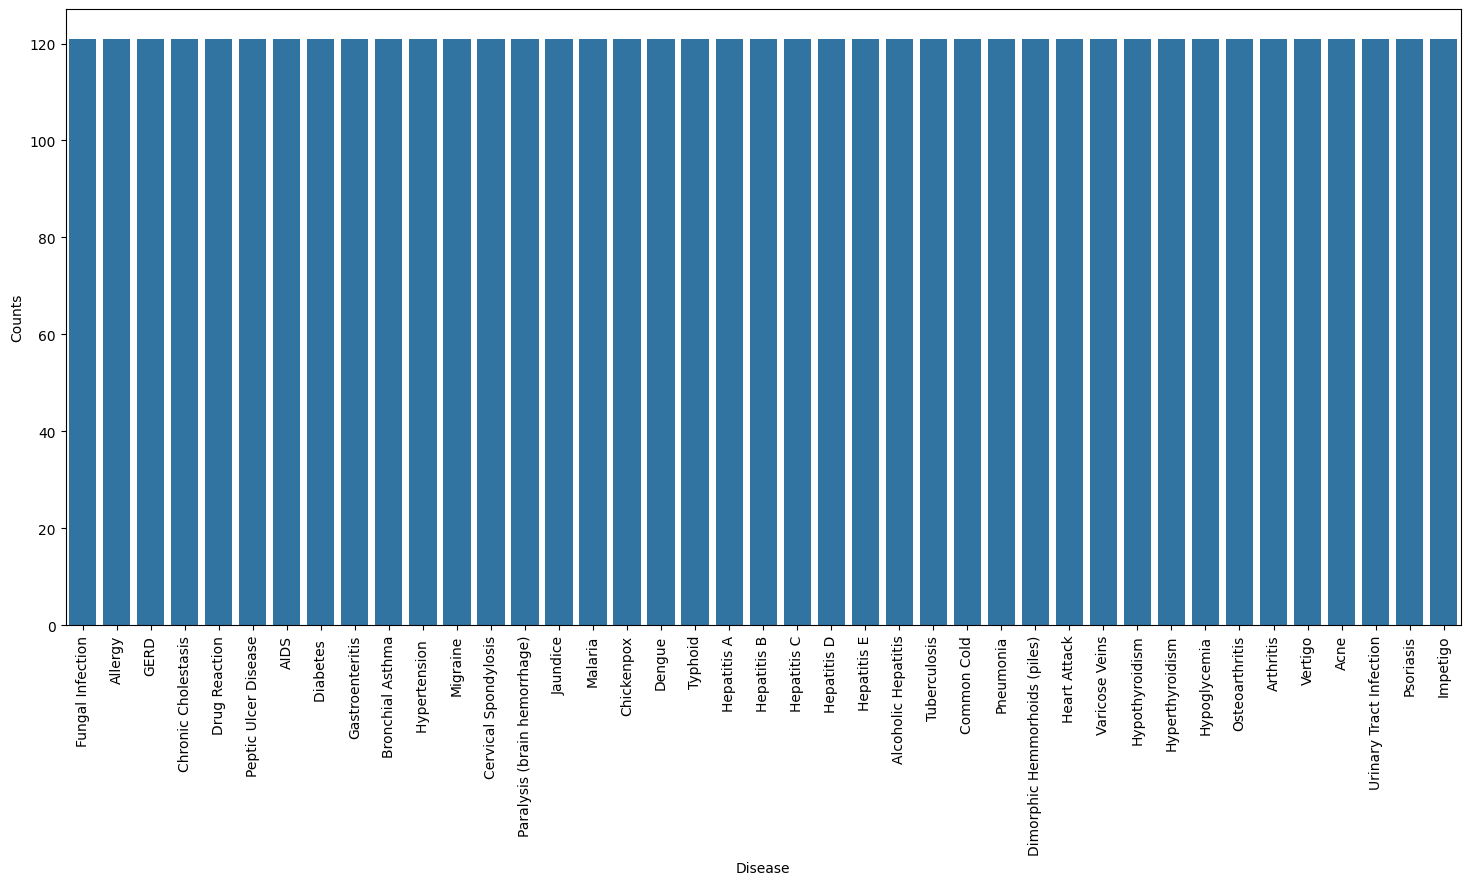

In [6]:
# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [7]:
#checking duplicate values
num_duplicates = data.duplicated().sum()
print(num_duplicates)

4657


In [8]:
# Removing duplicate rows
data = data.drop_duplicates()

num_duplicates_after_removal = data.duplicated().sum()
print(num_duplicates_after_removal)


0


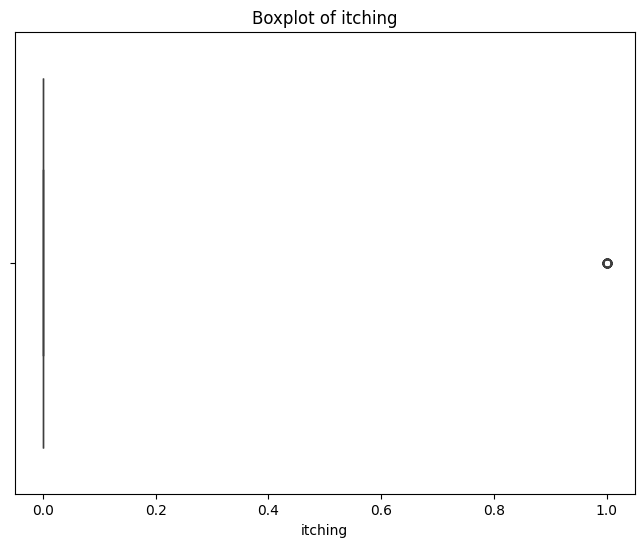

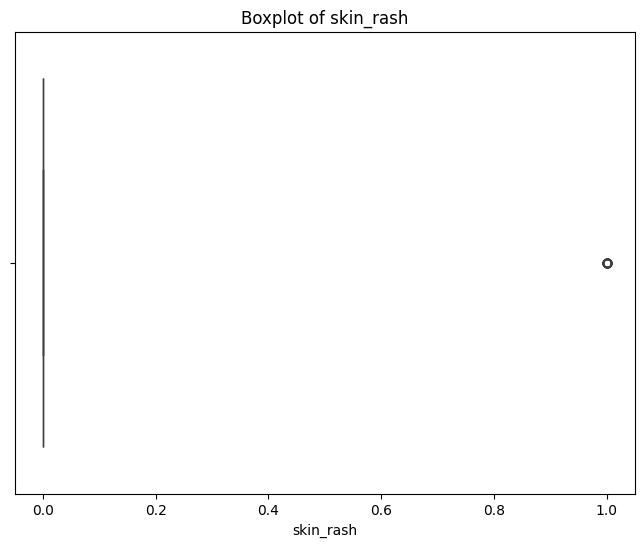

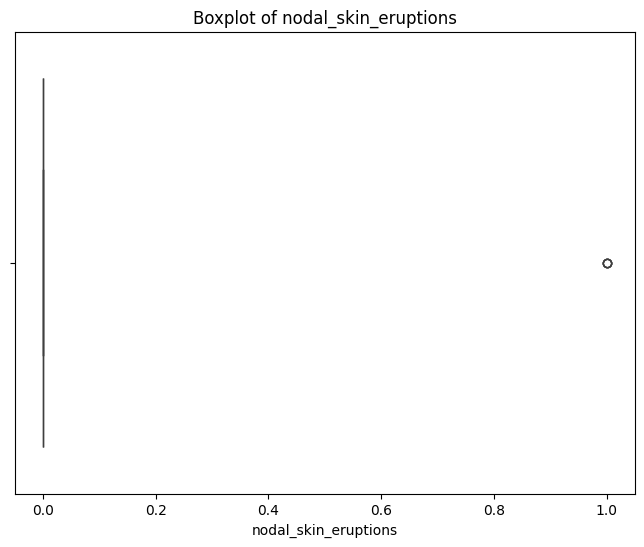

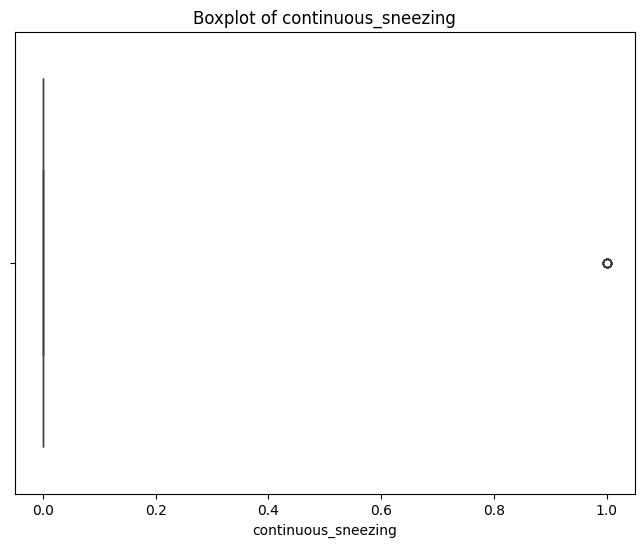

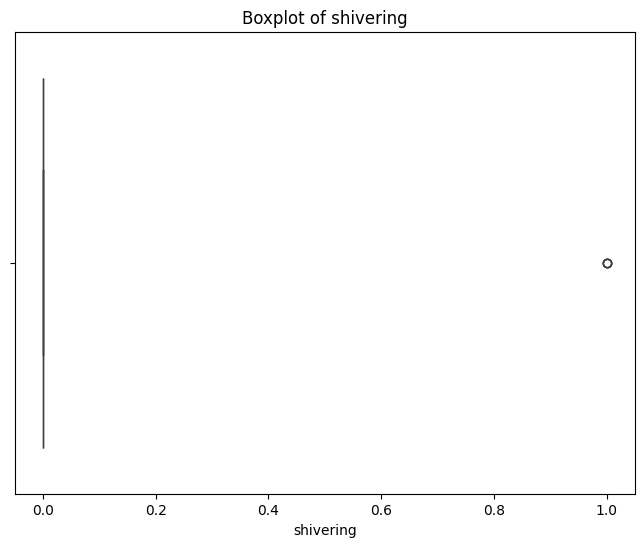

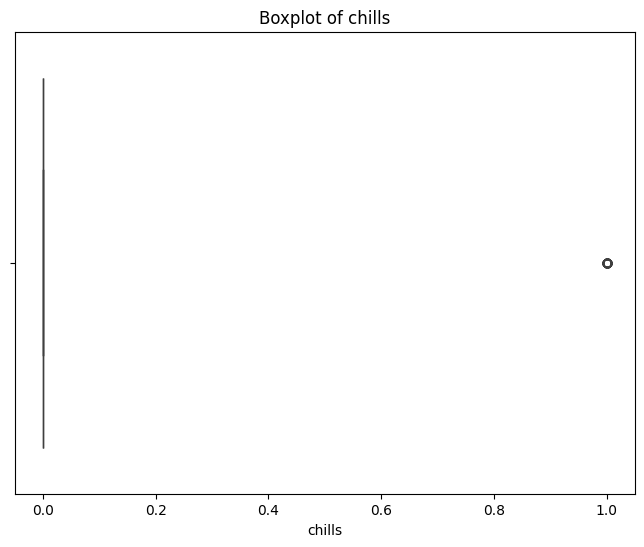

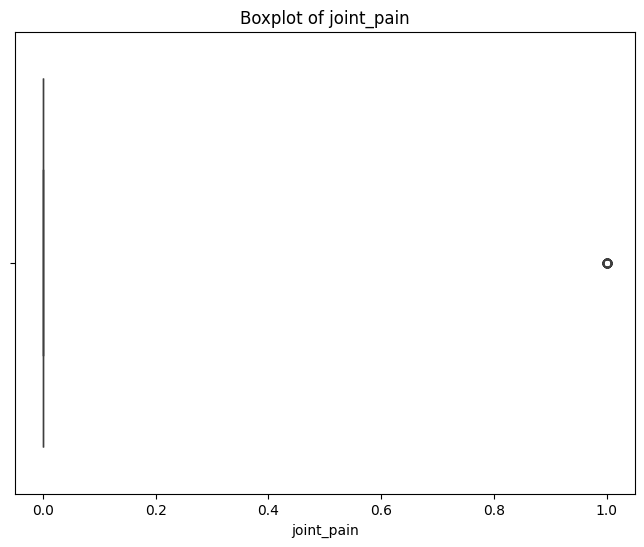

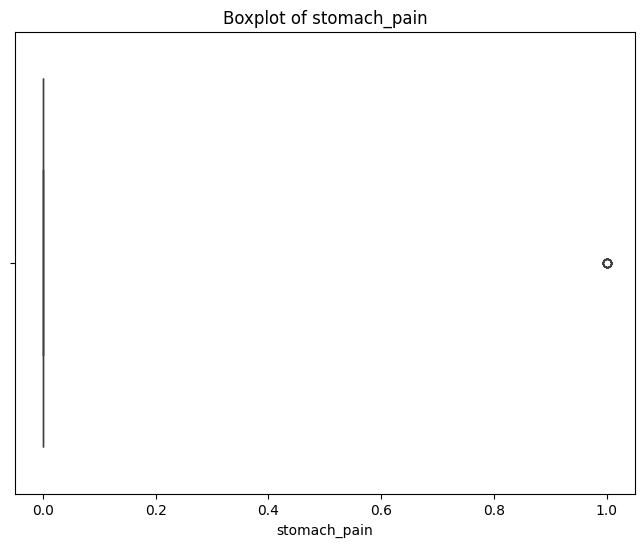

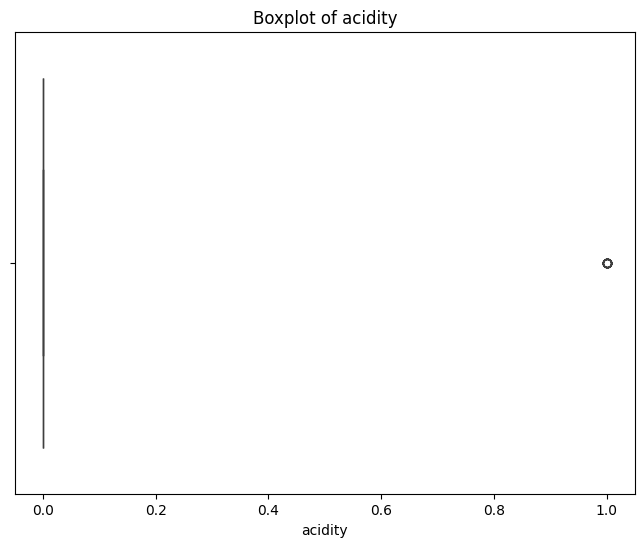

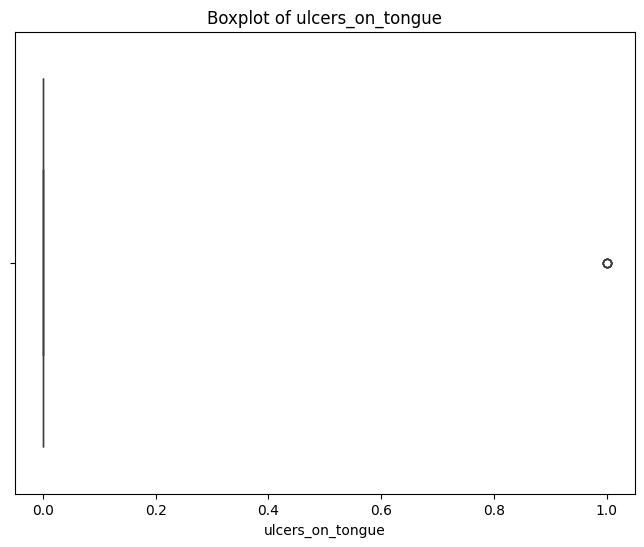

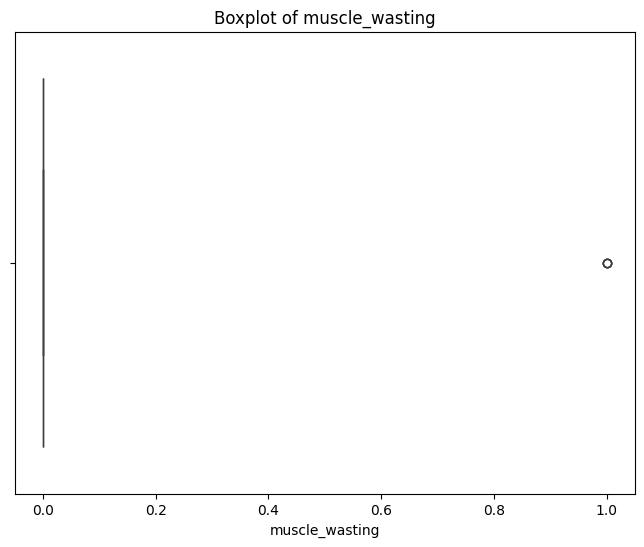

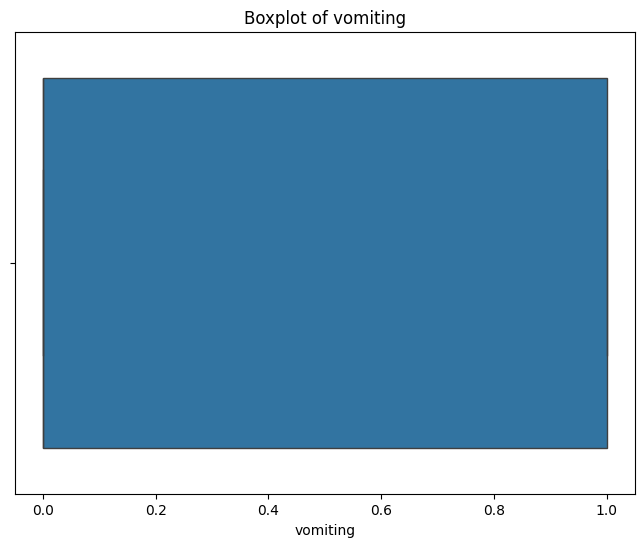

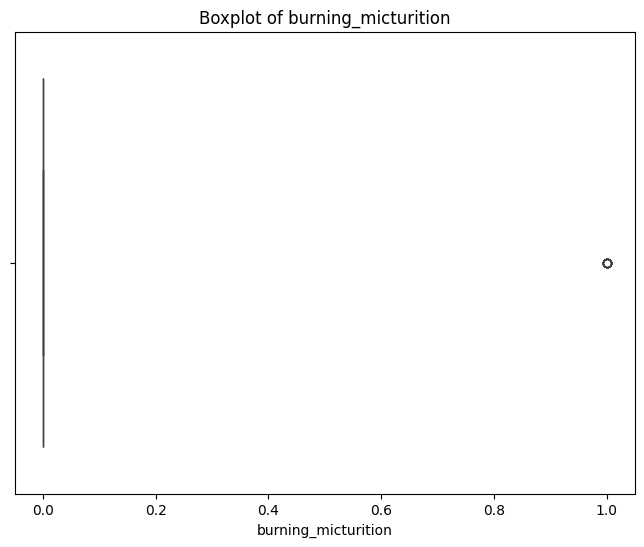

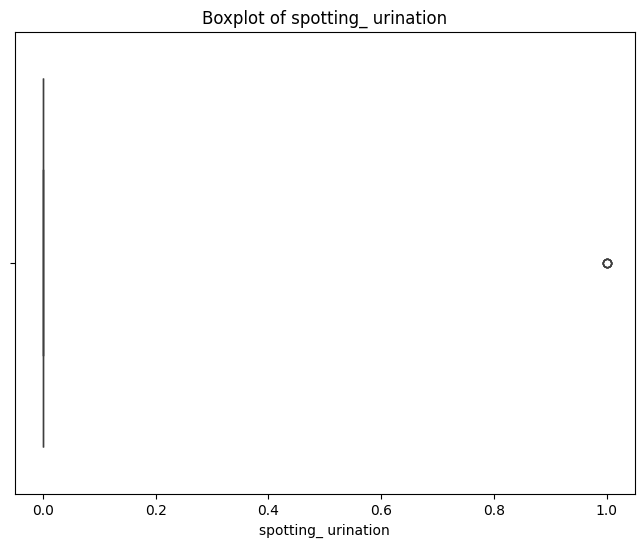

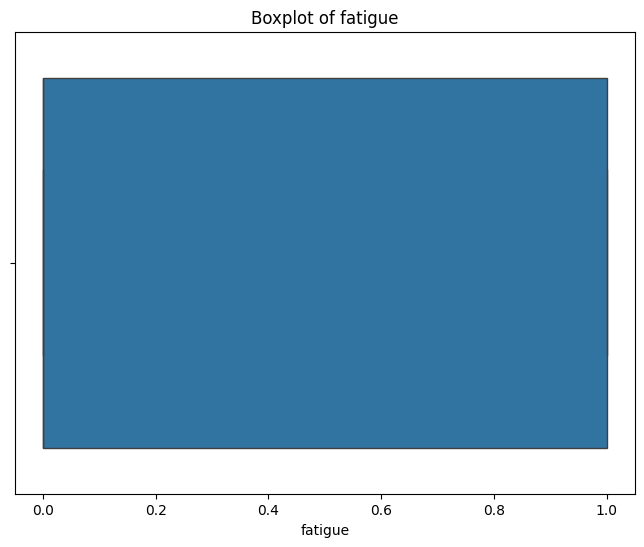

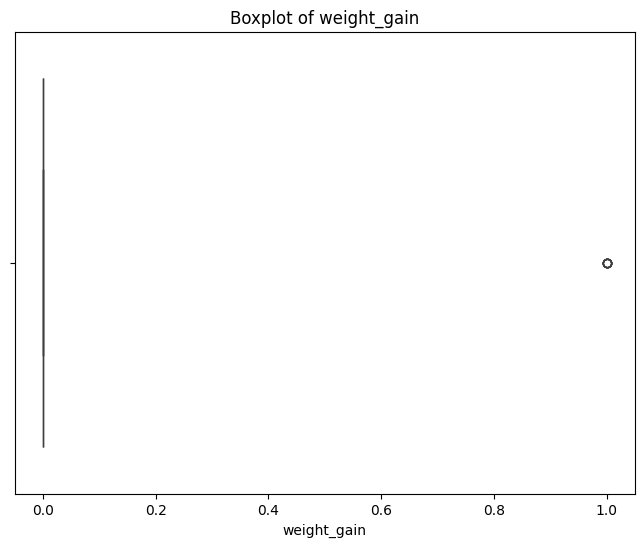

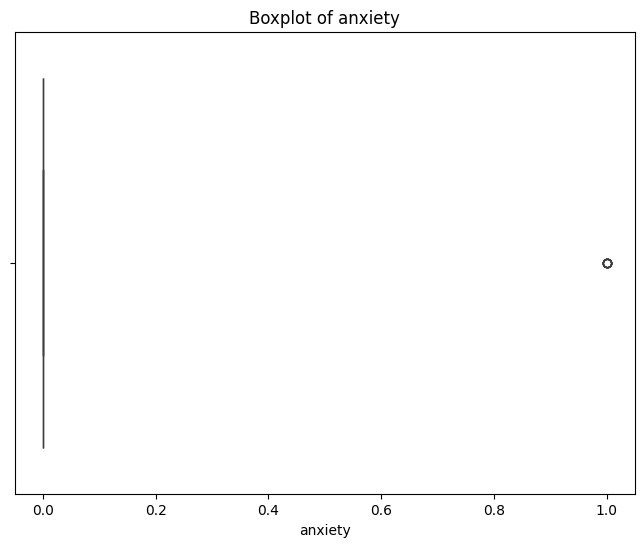

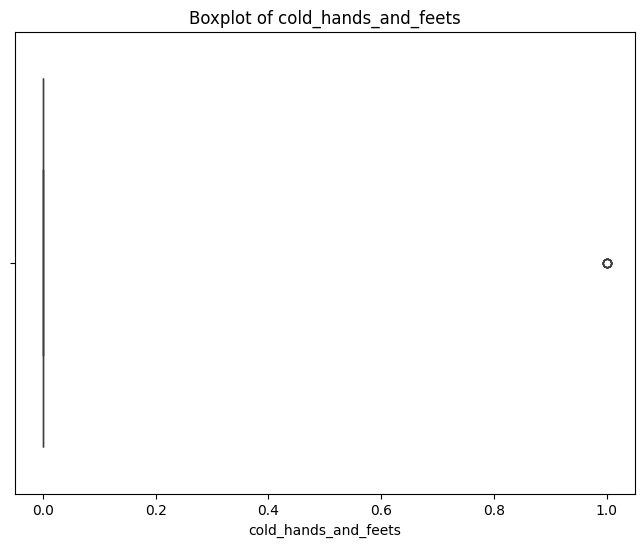

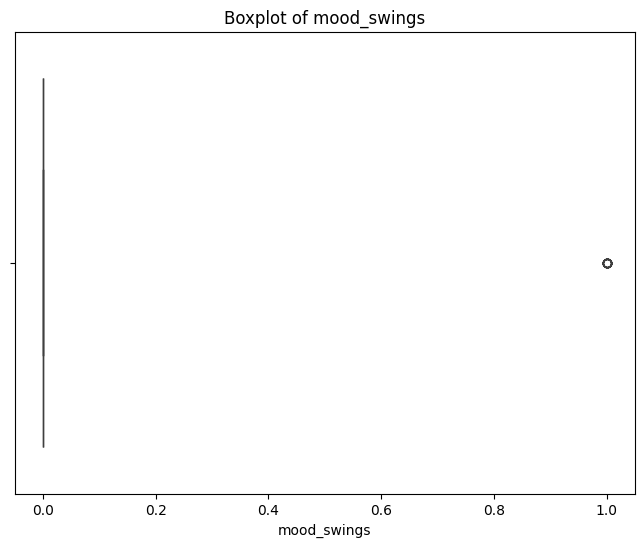

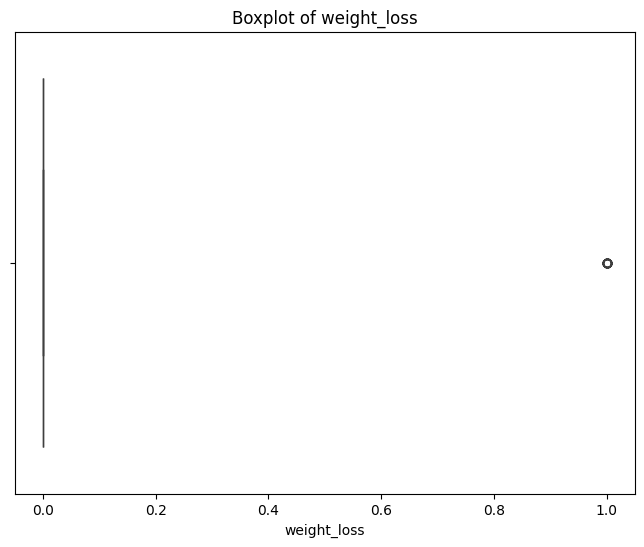

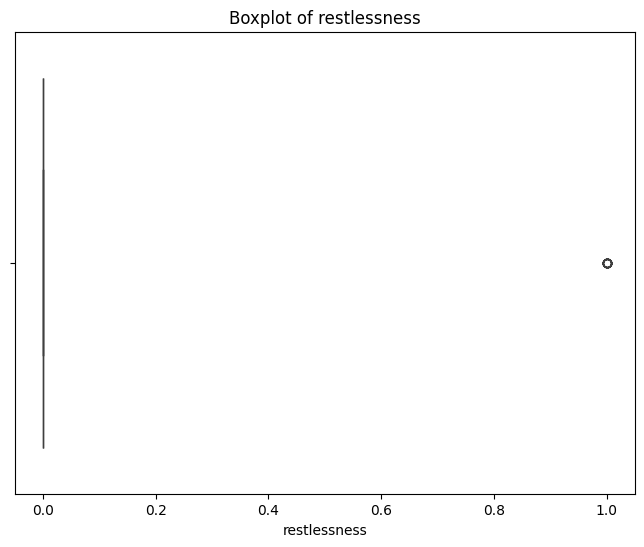

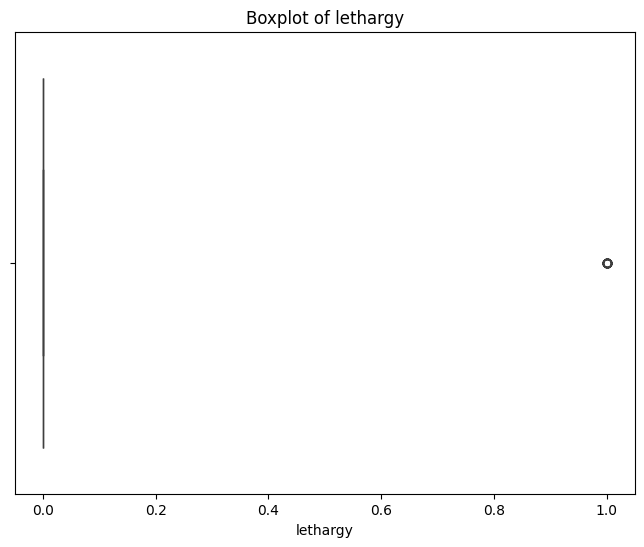

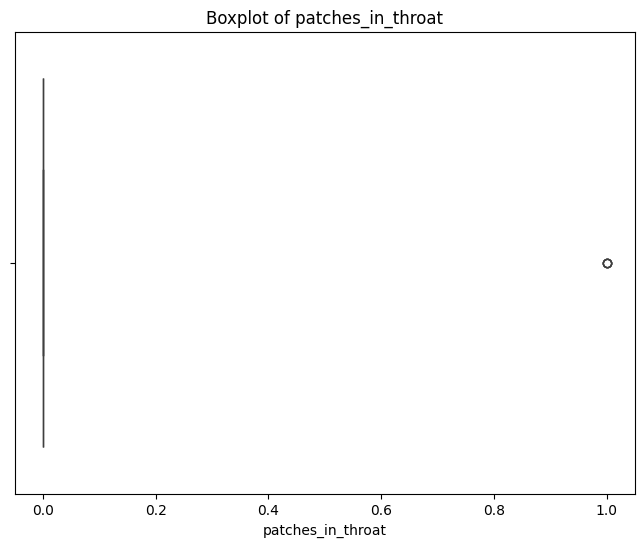

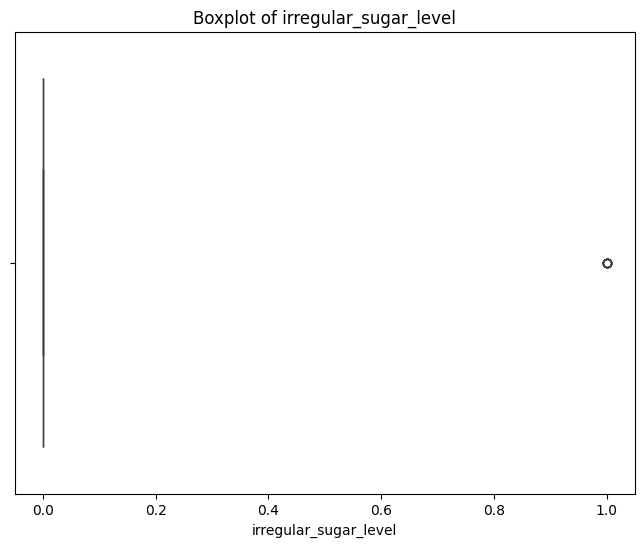

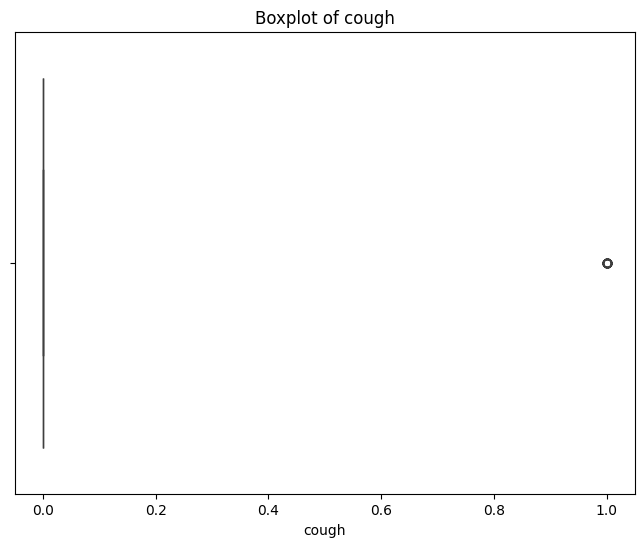

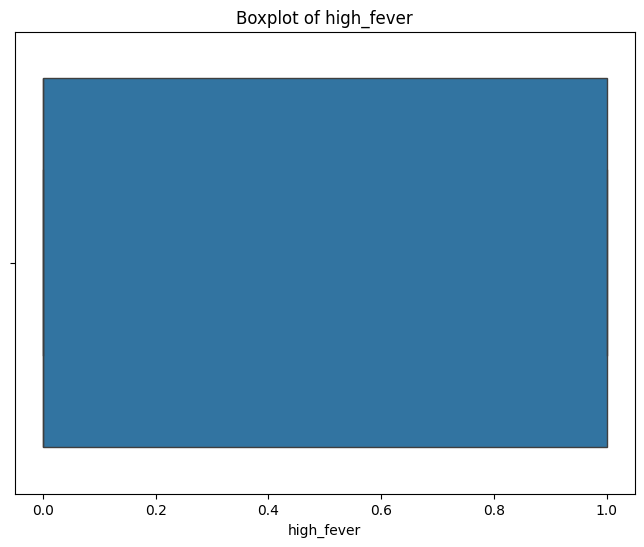

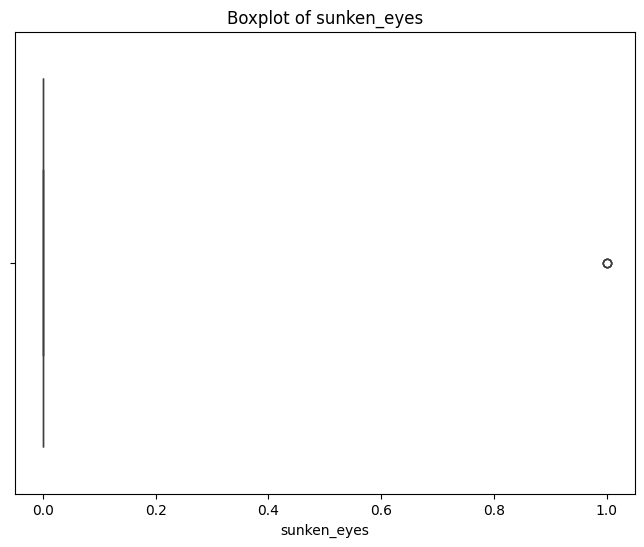

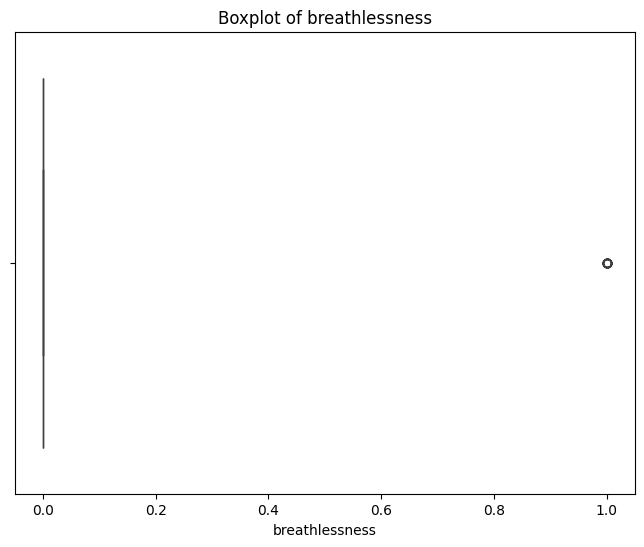

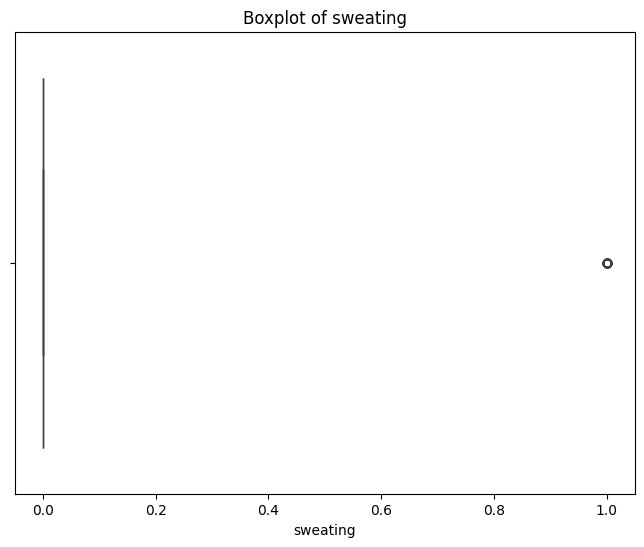

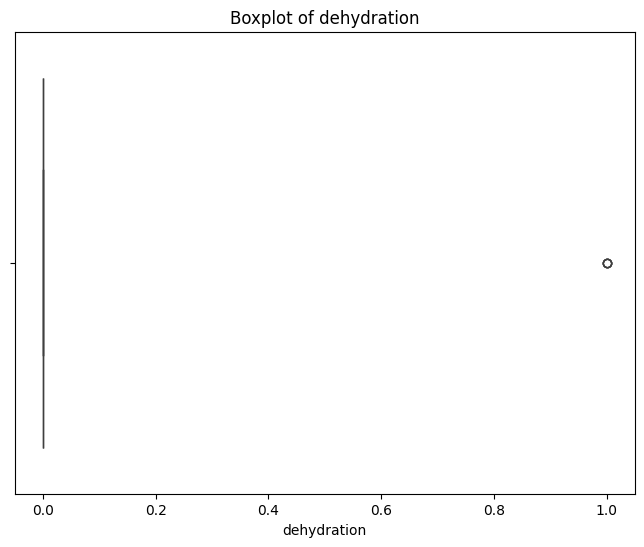

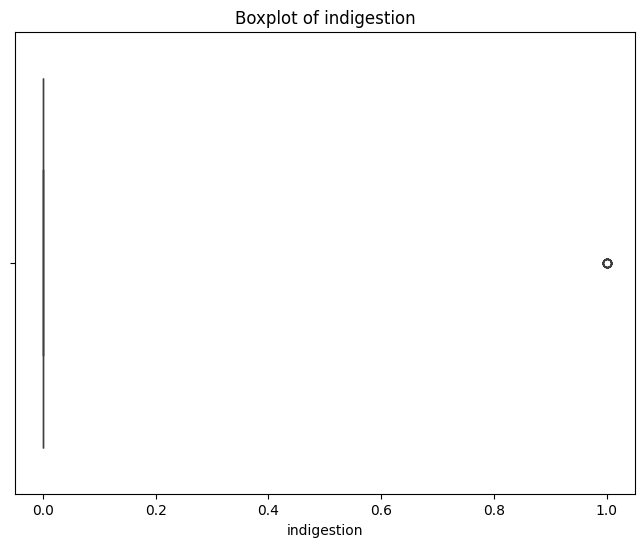

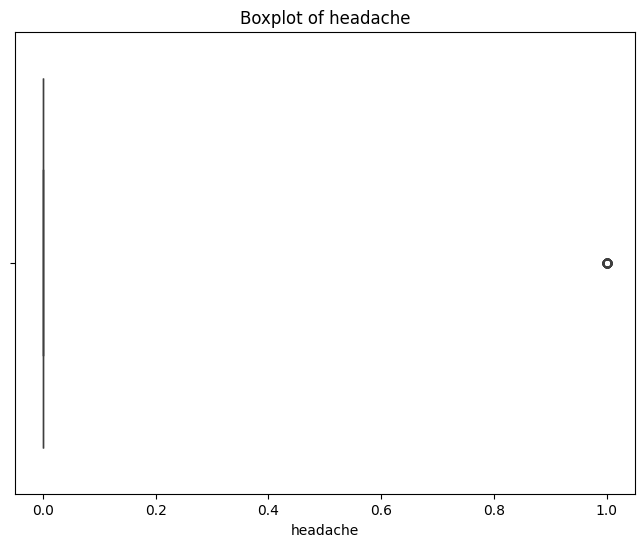

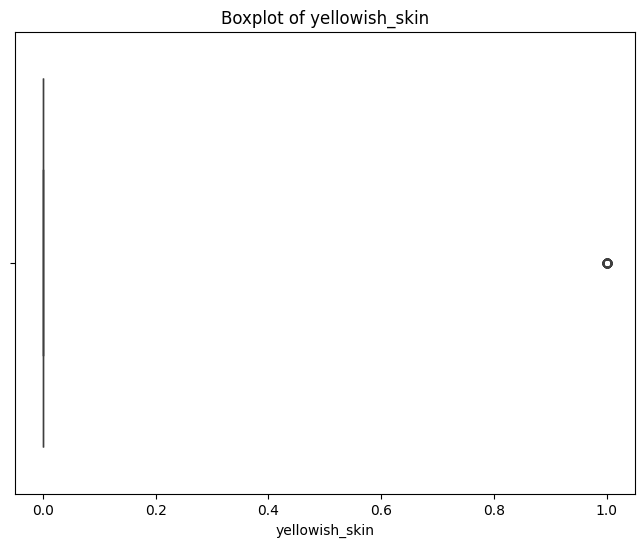

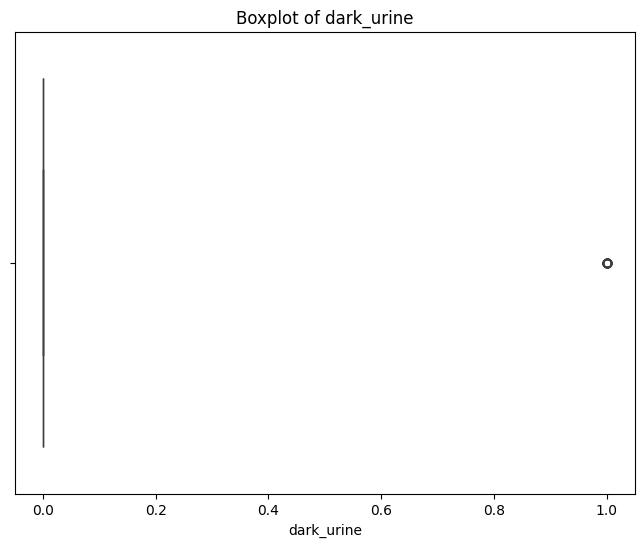

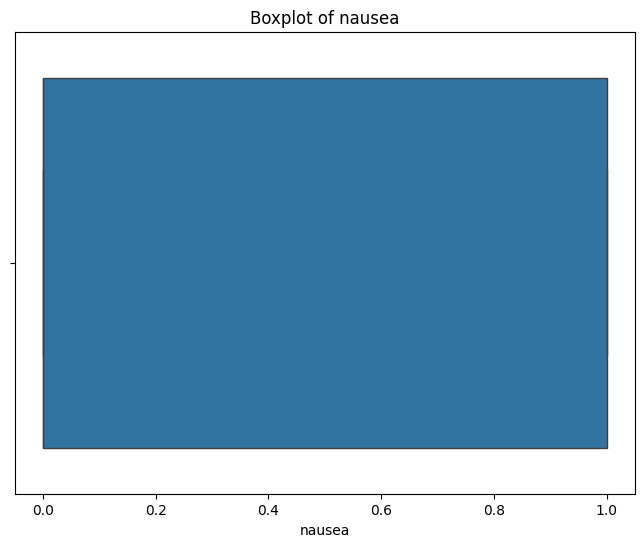

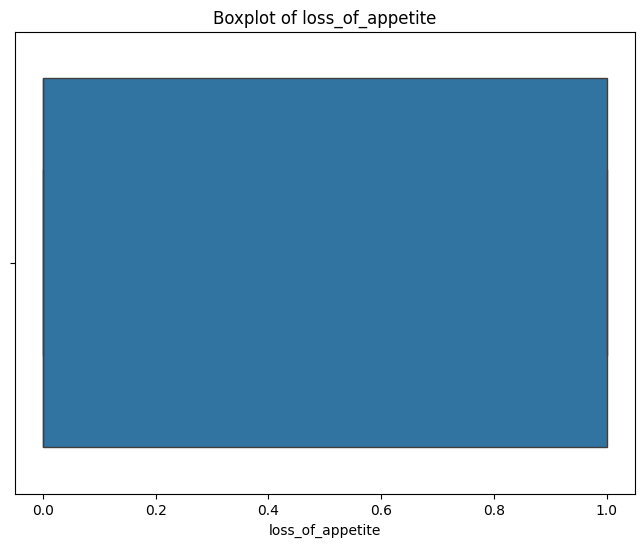

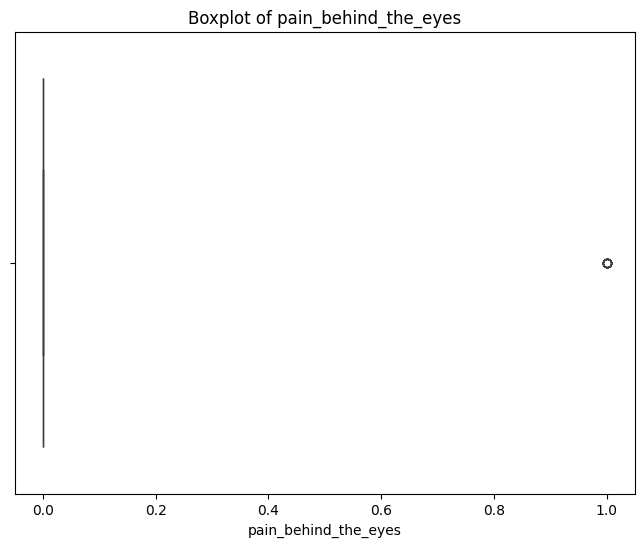

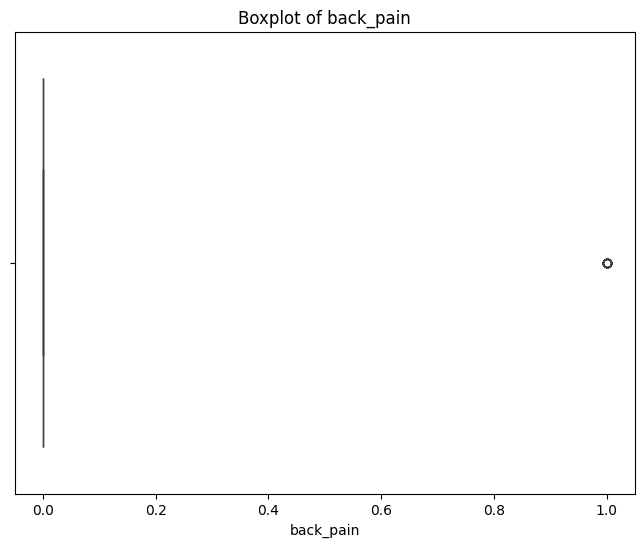

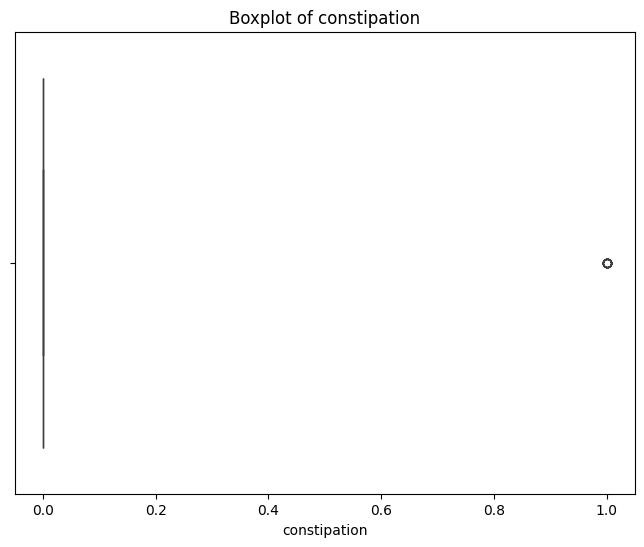

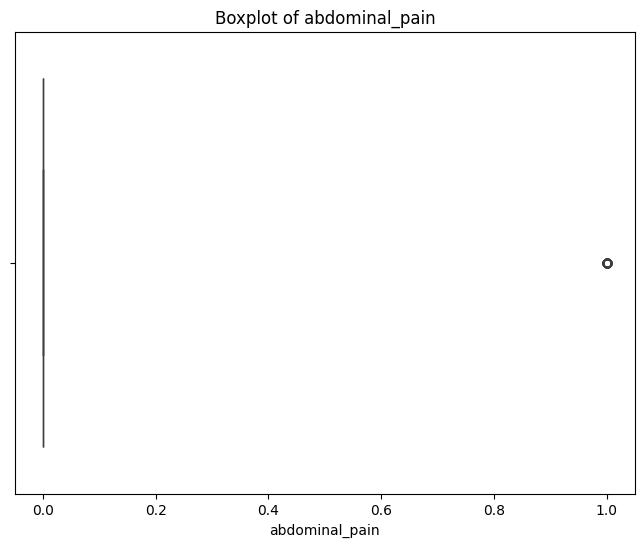

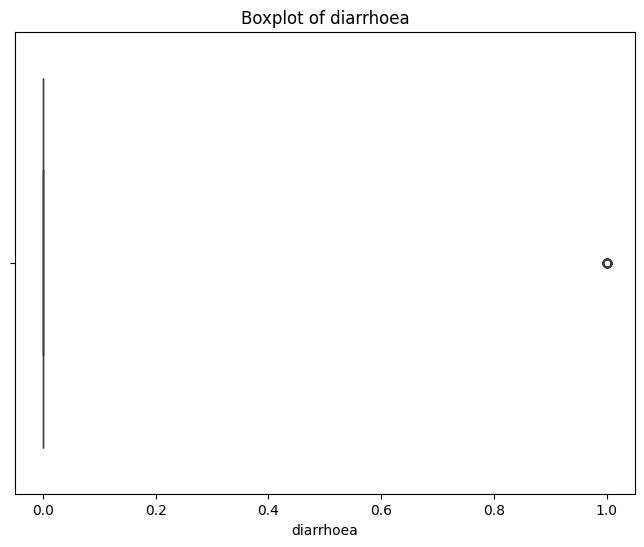

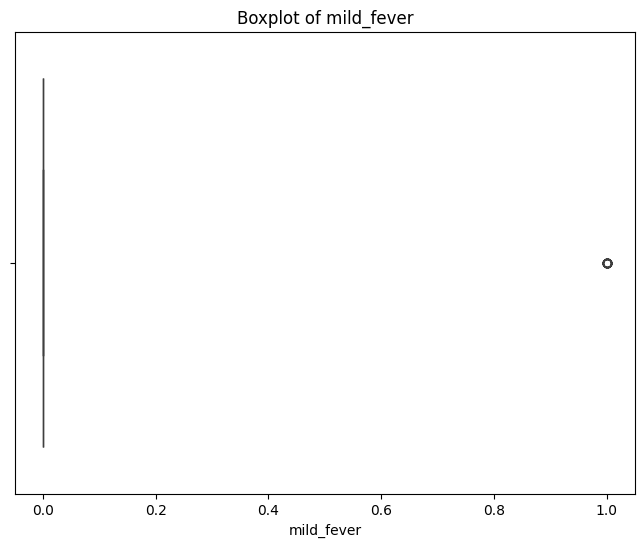

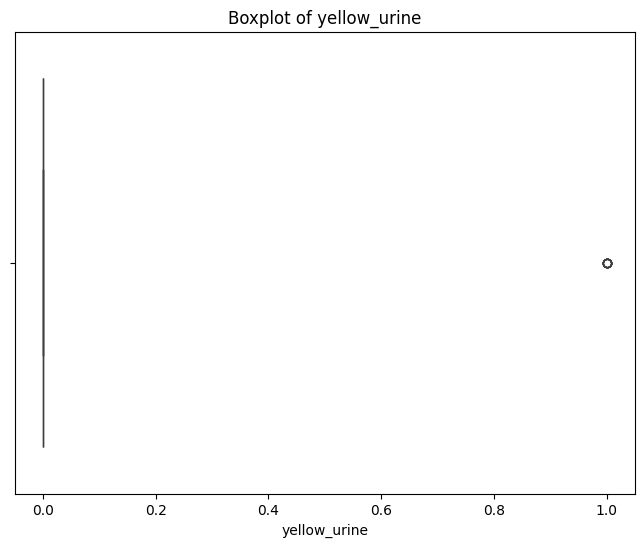

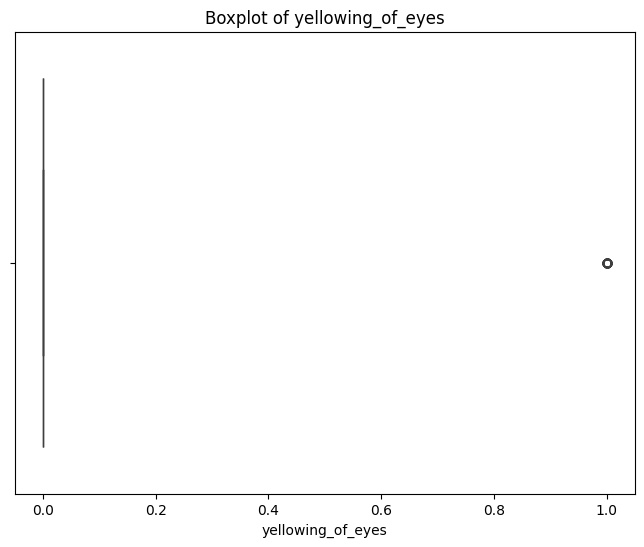

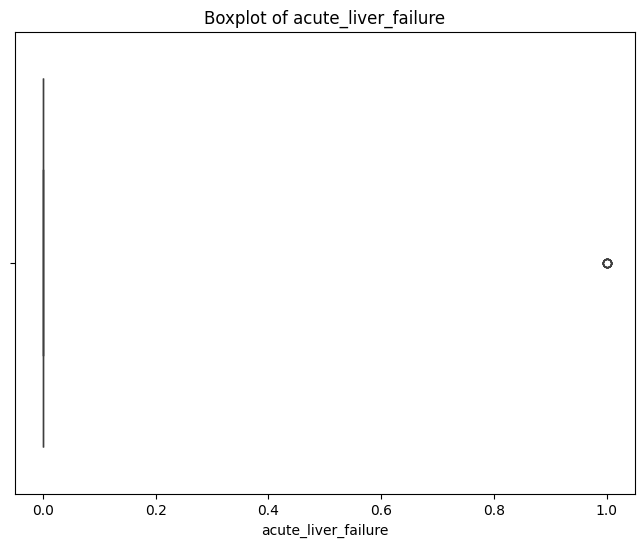

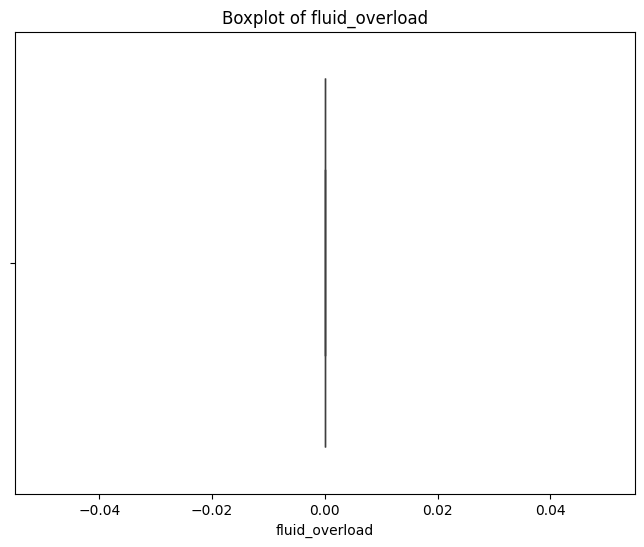

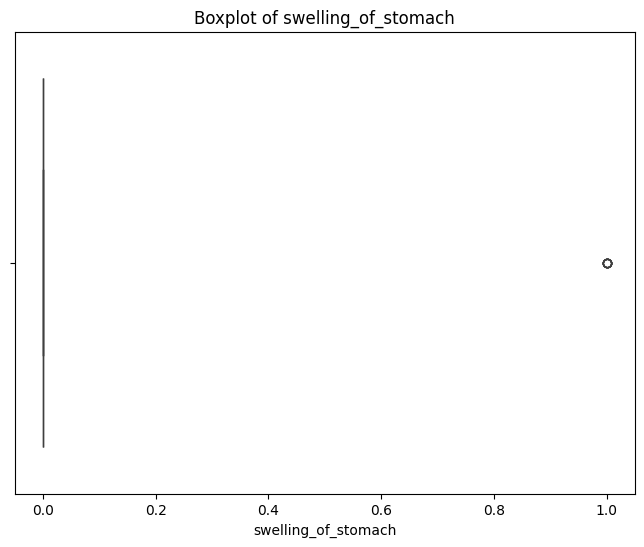

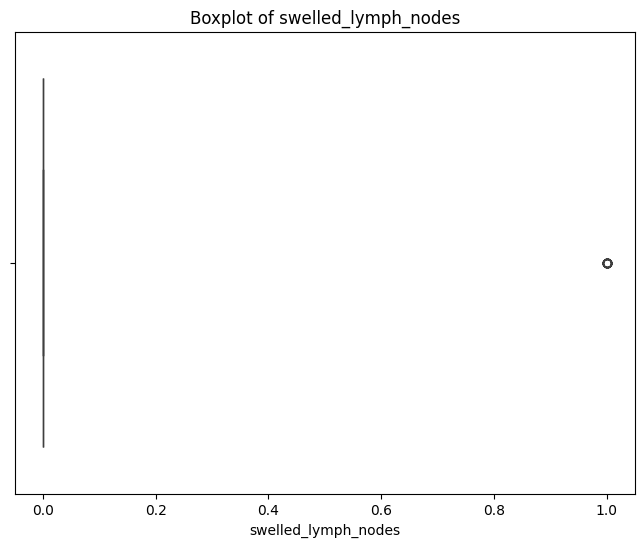

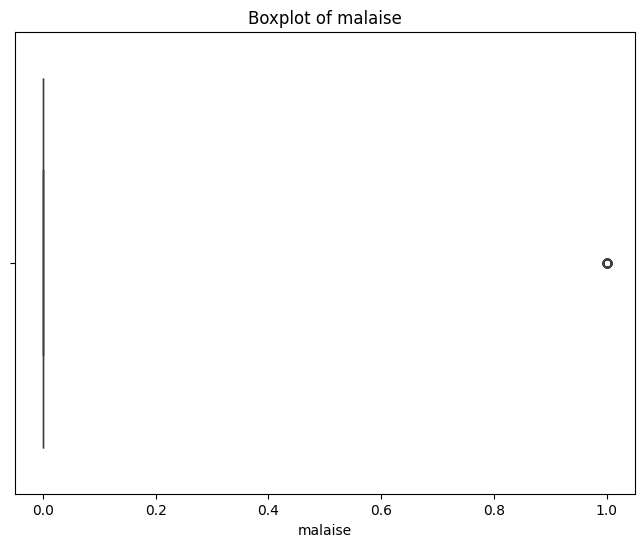

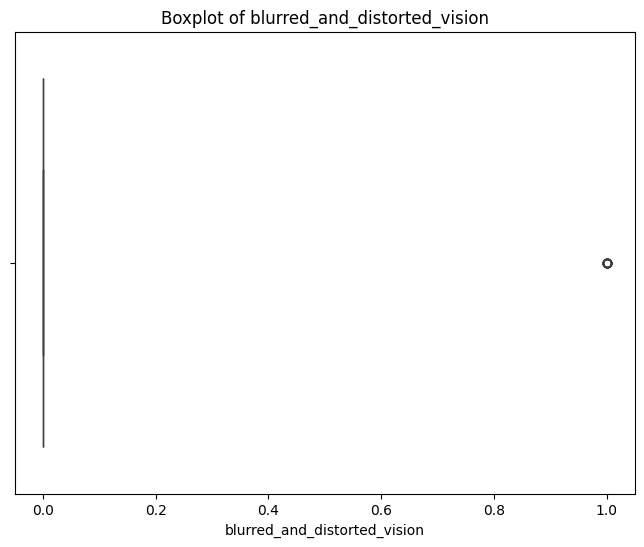

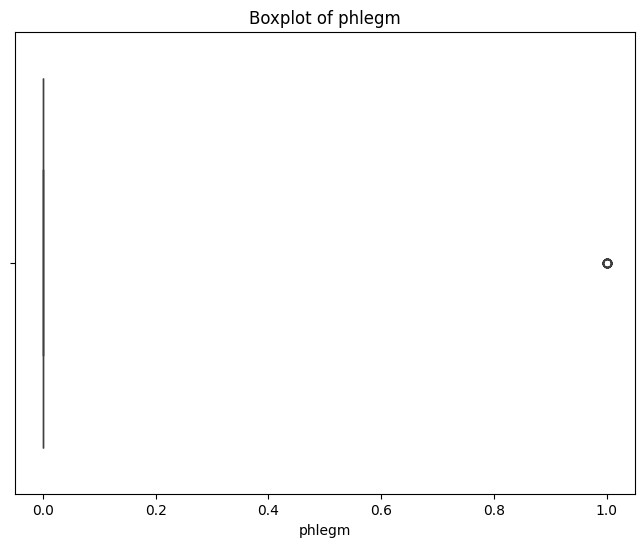

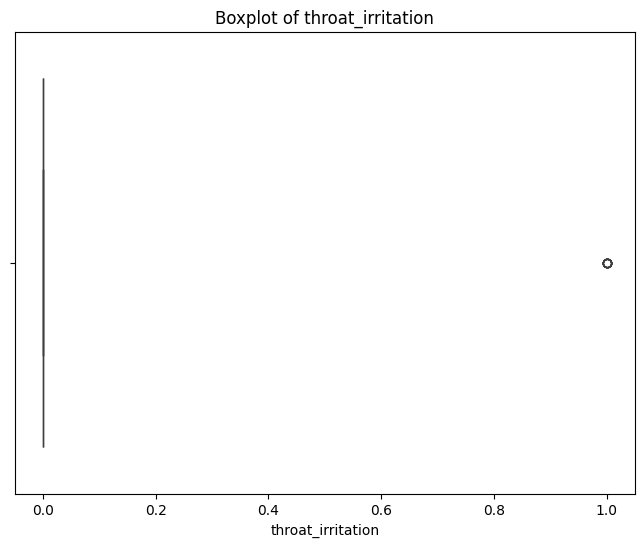

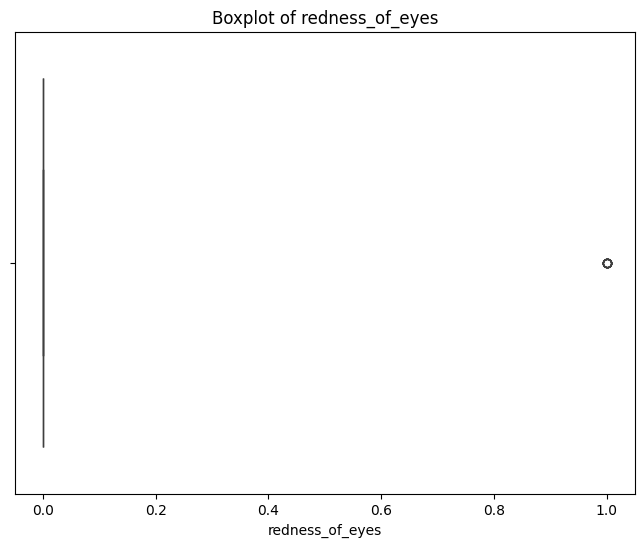

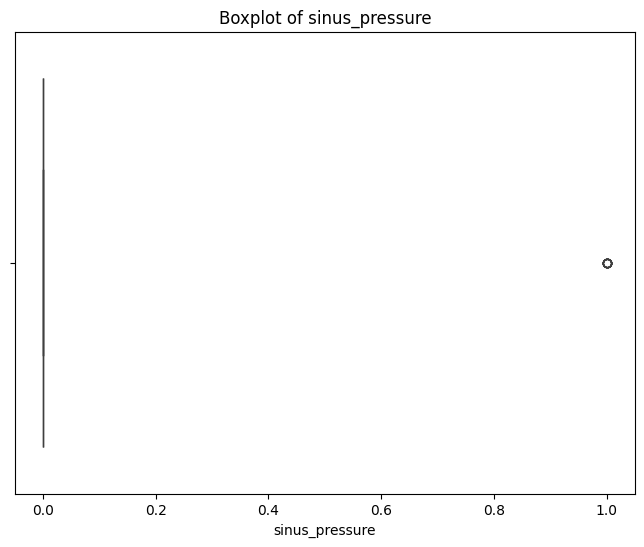

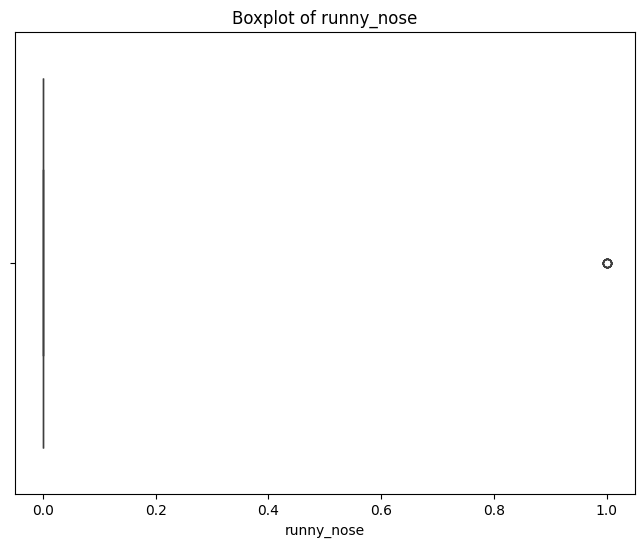

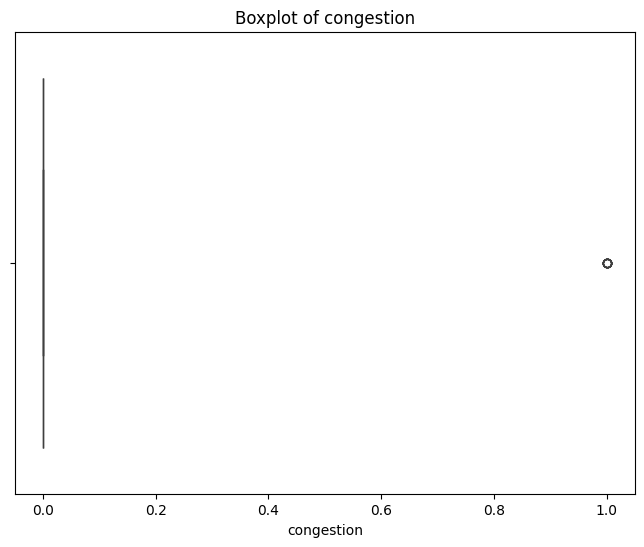

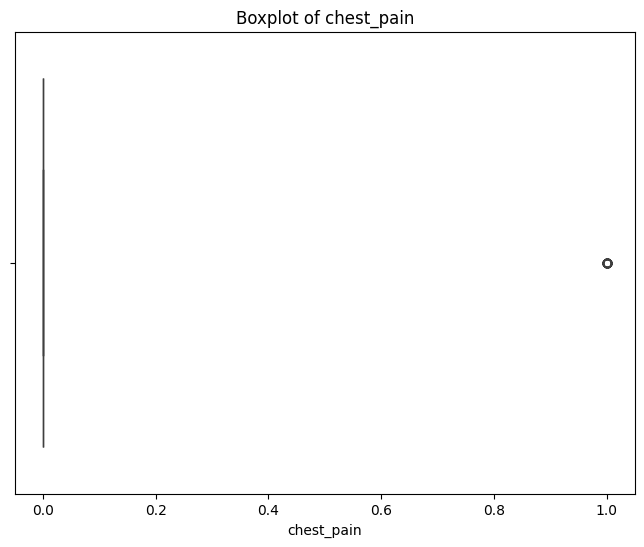

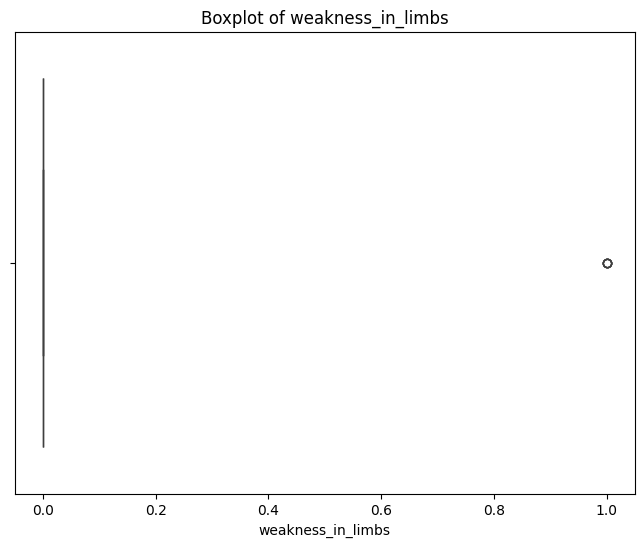

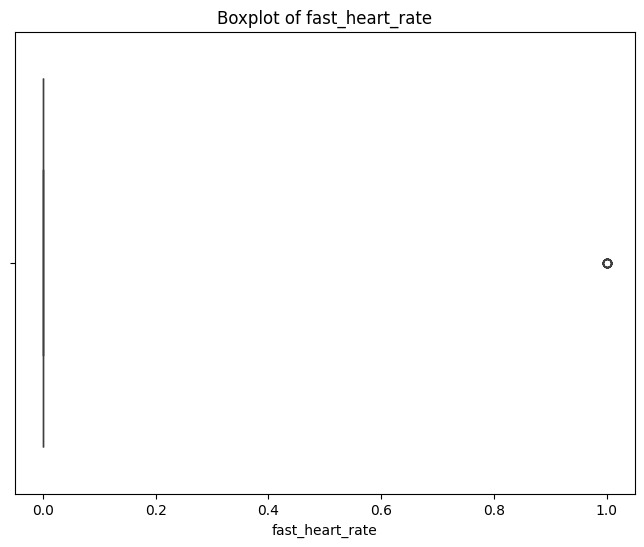

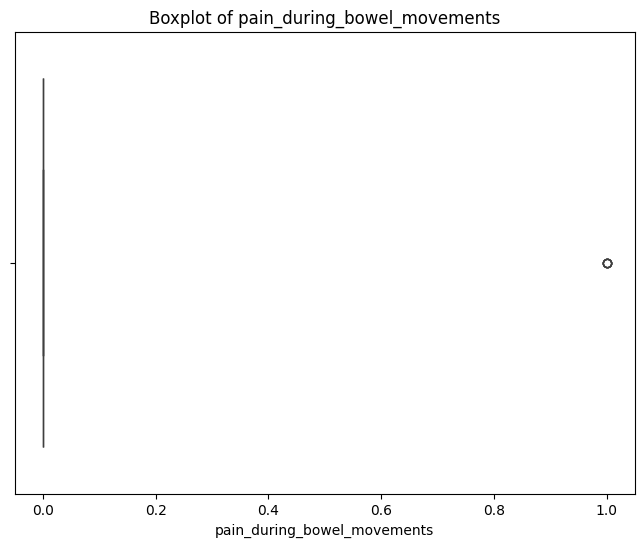

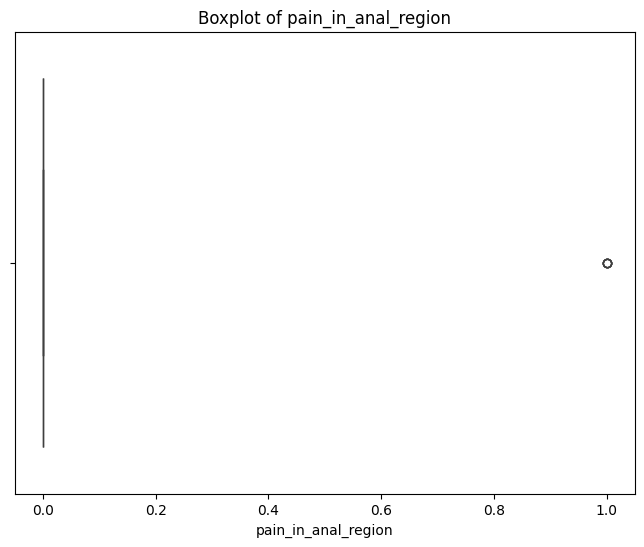

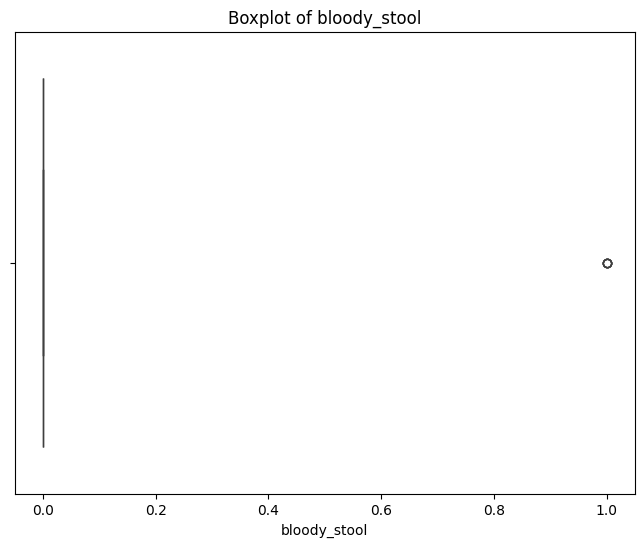

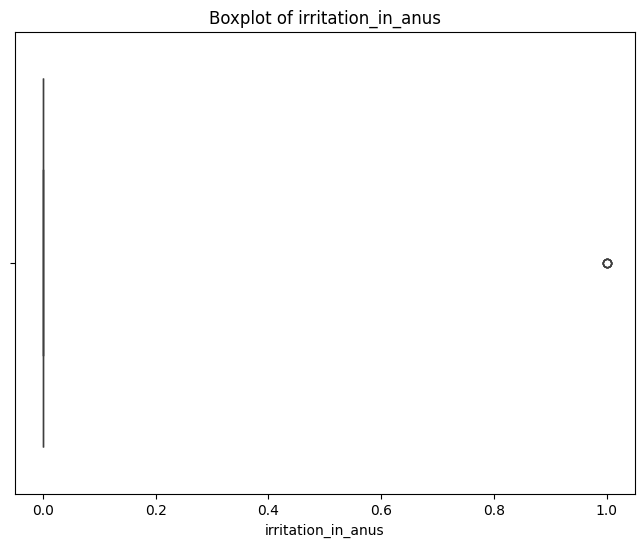

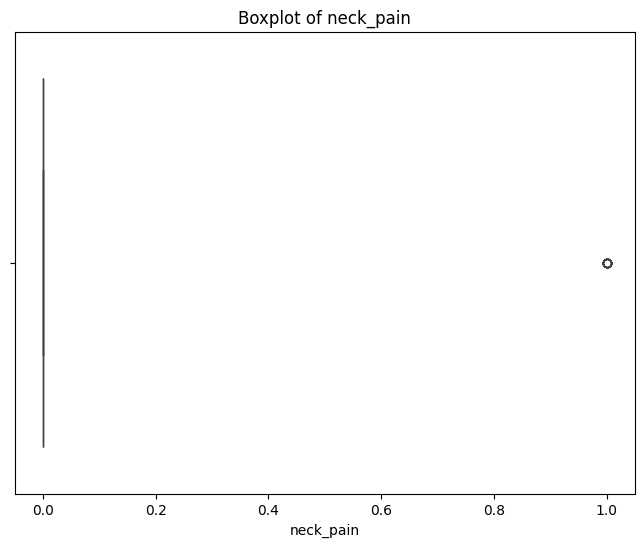

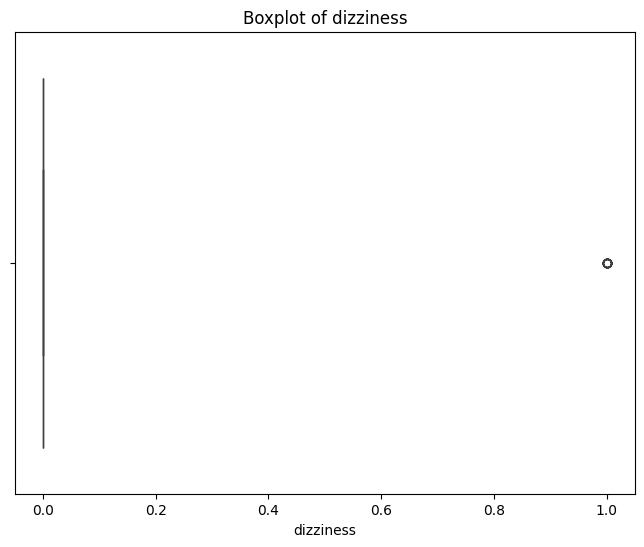

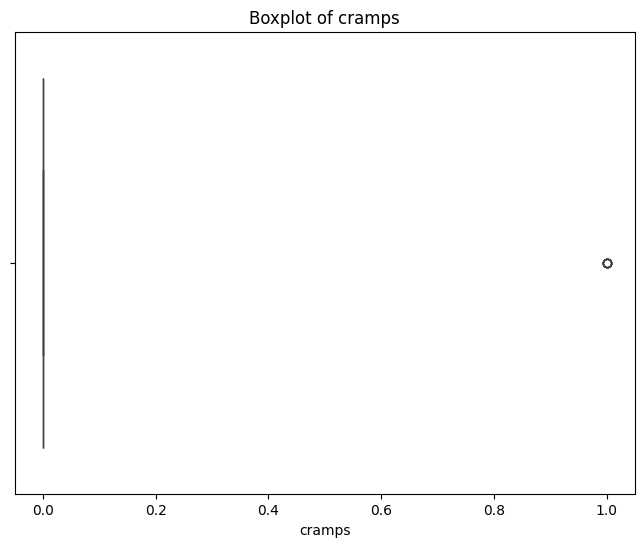

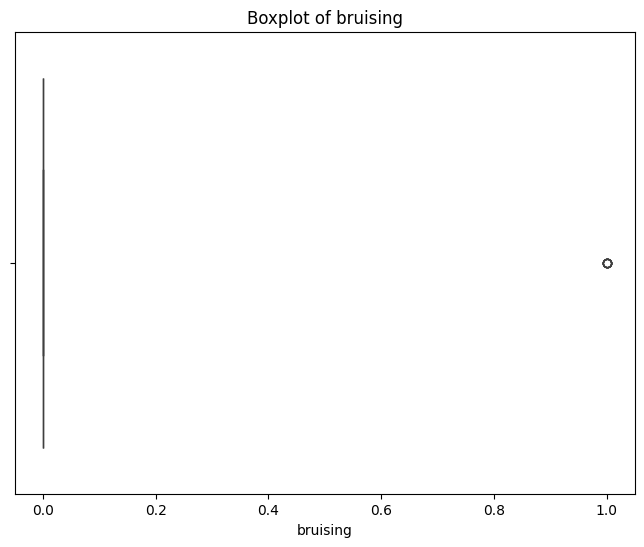

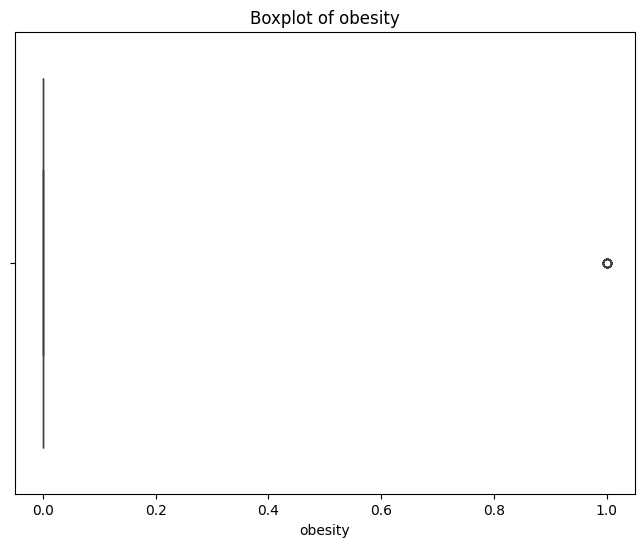

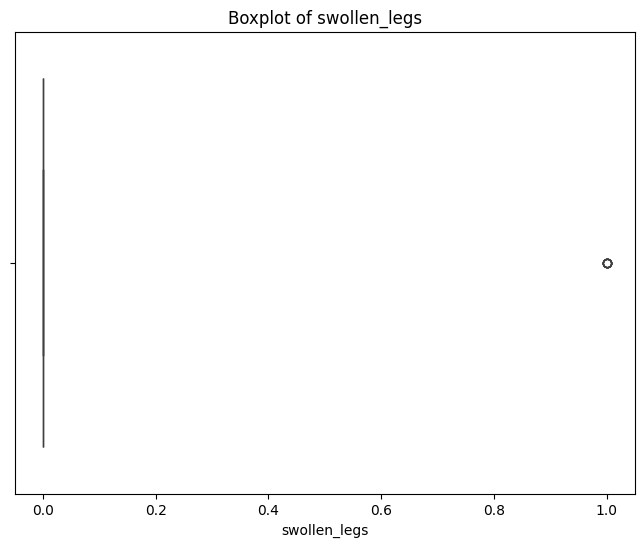

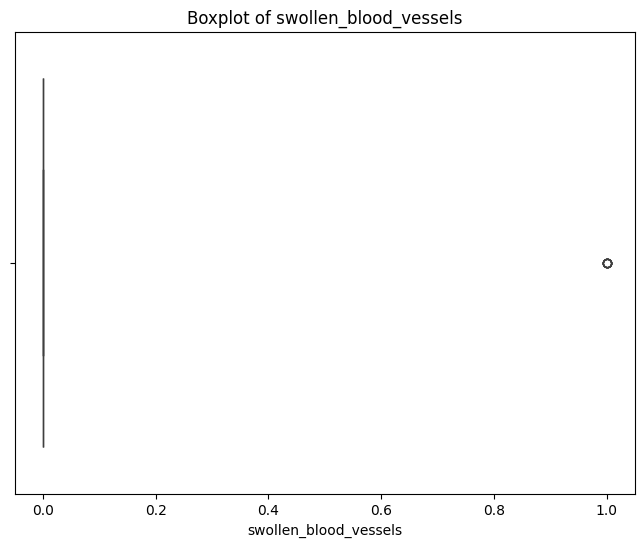

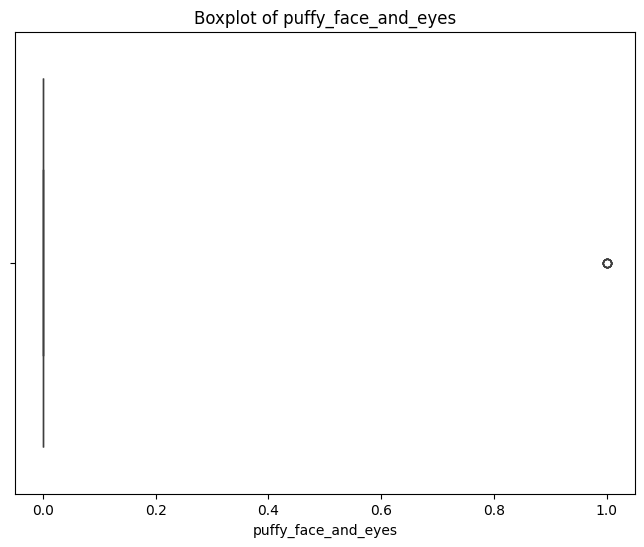

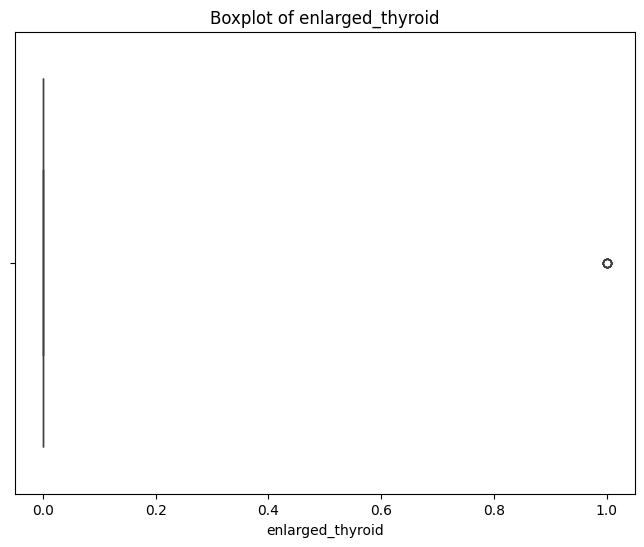

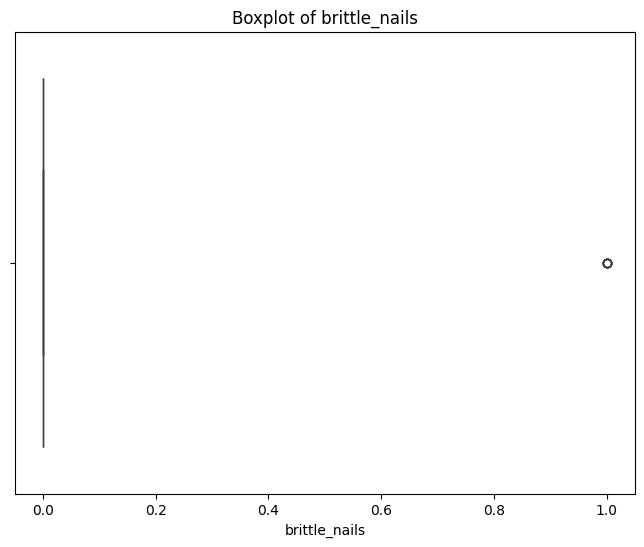

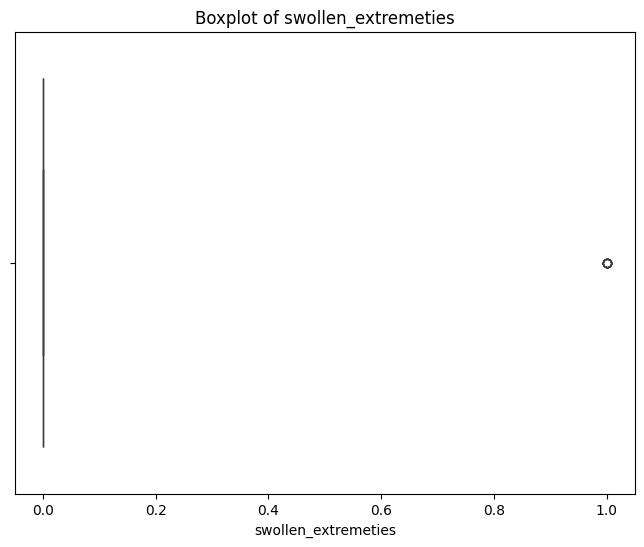

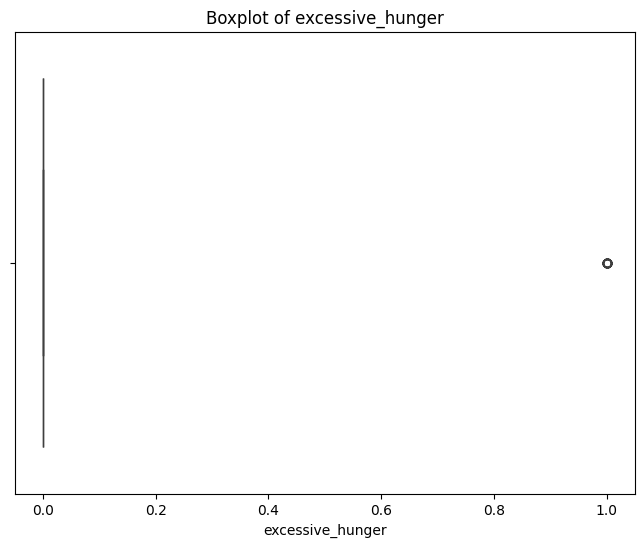

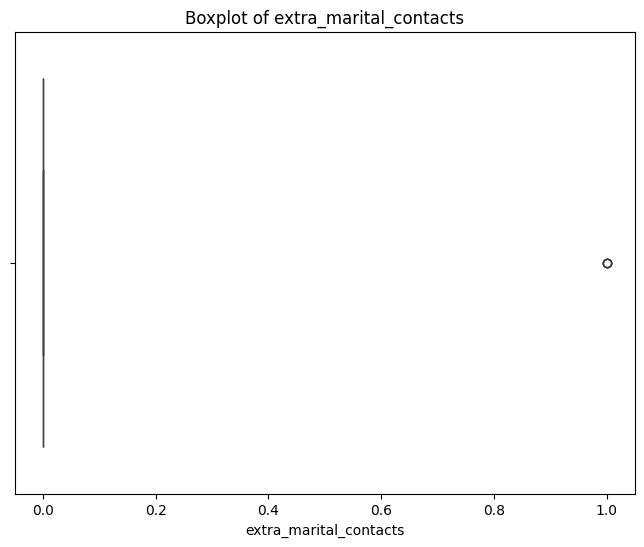

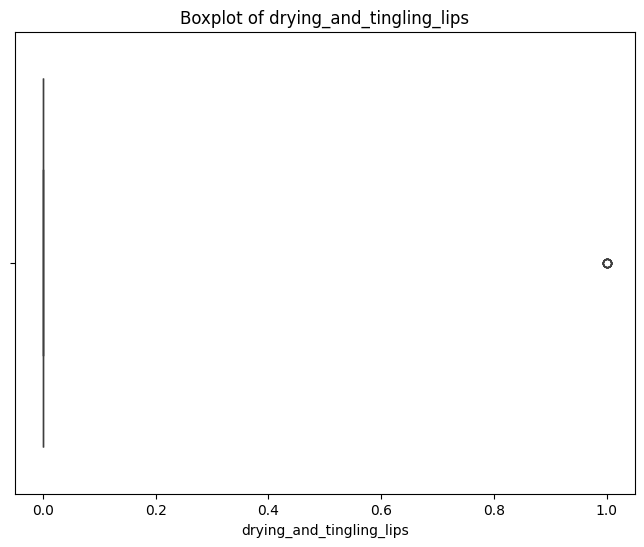

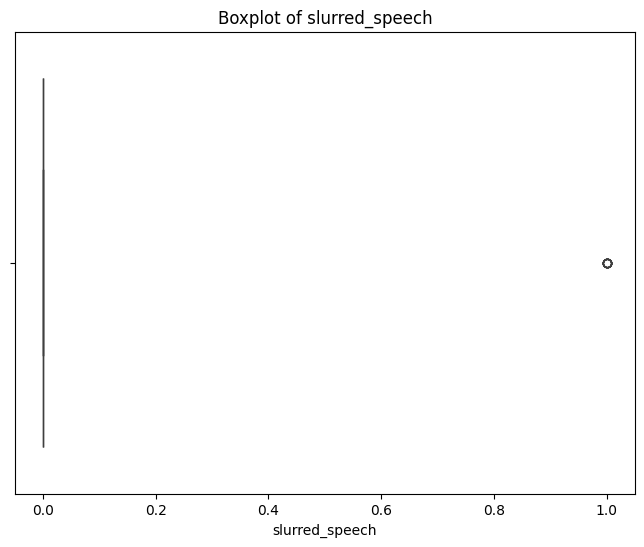

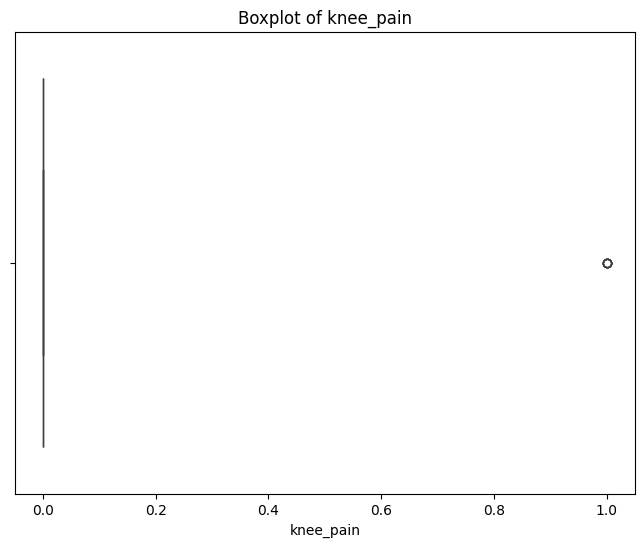

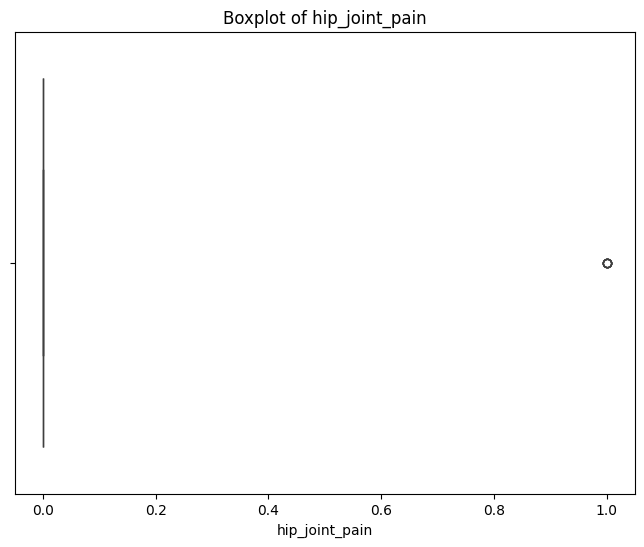

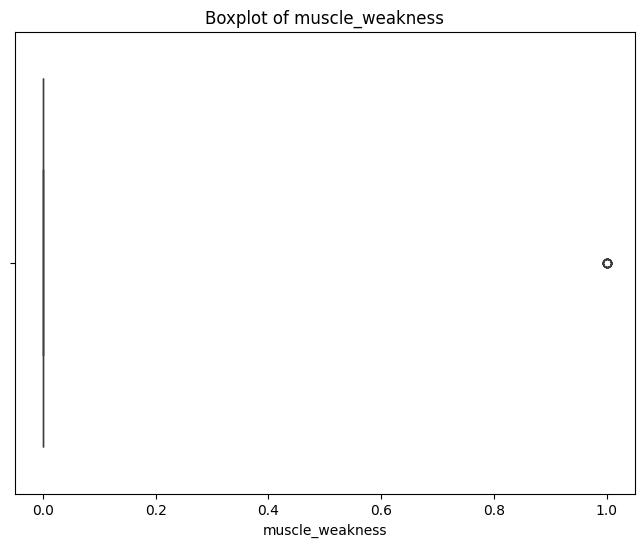

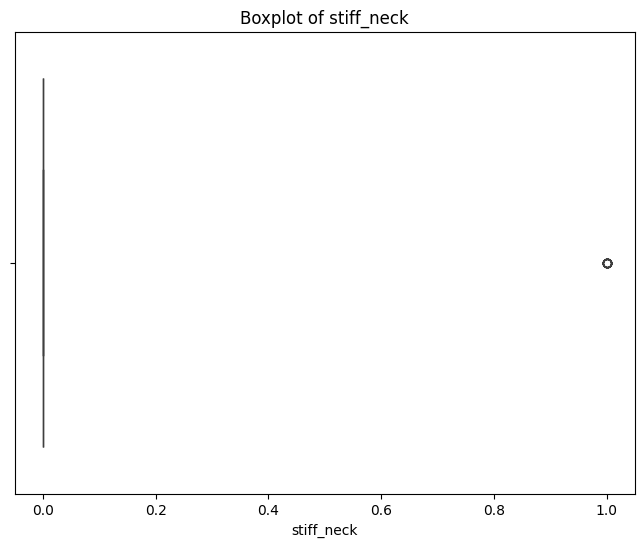

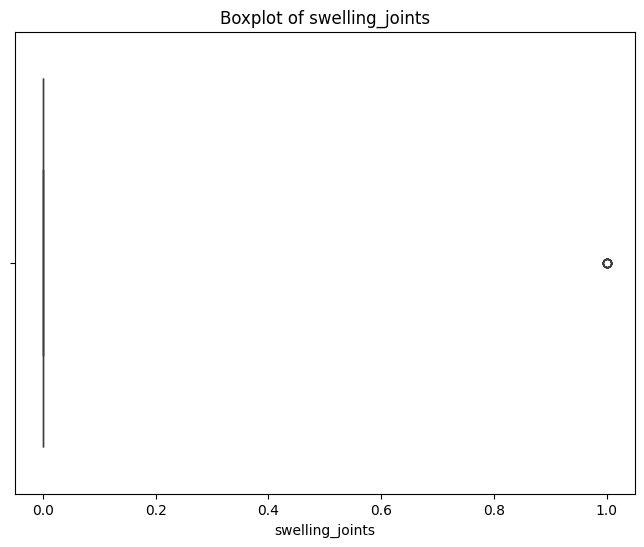

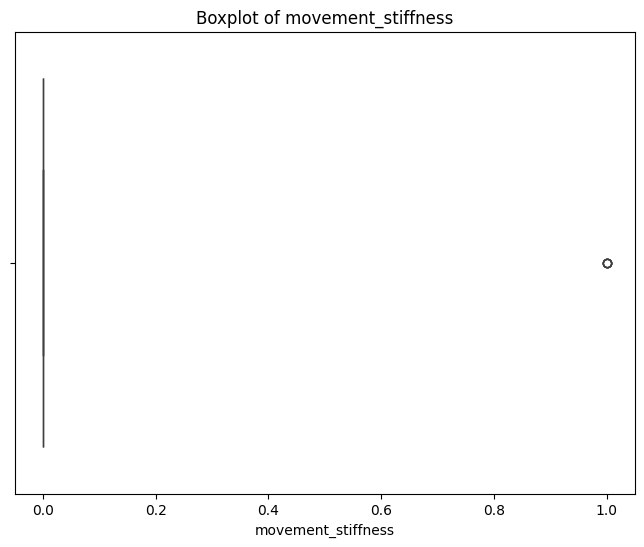

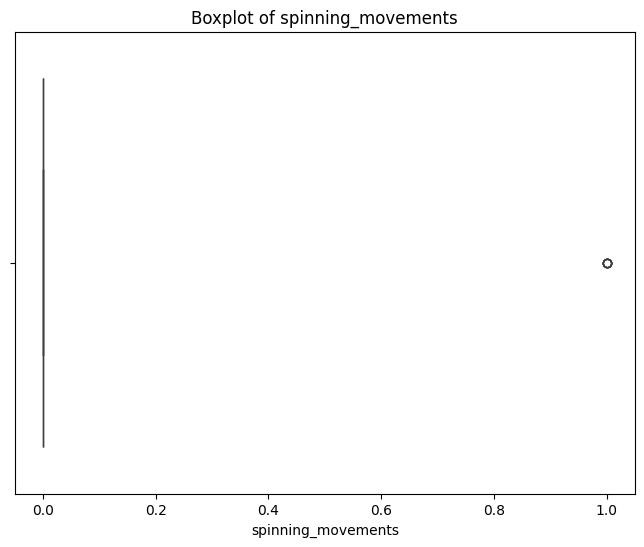

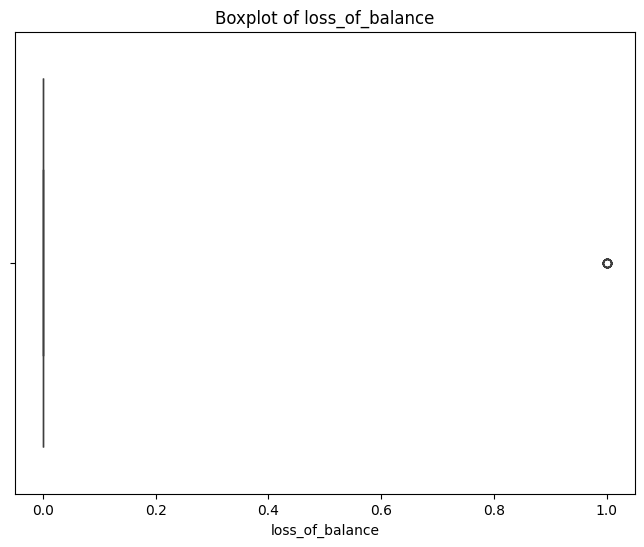

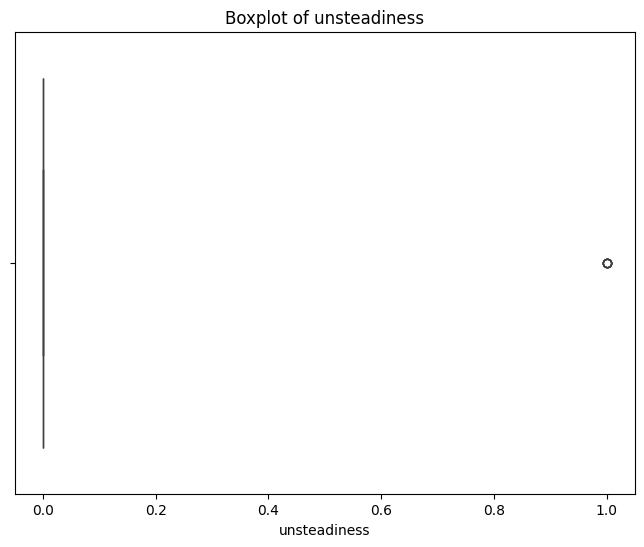

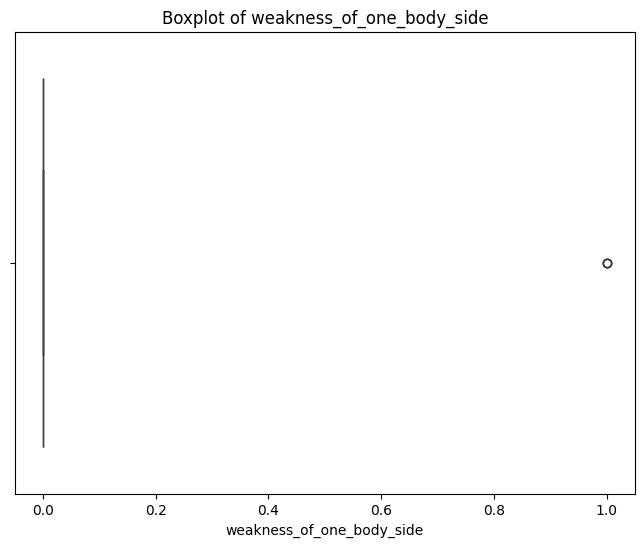

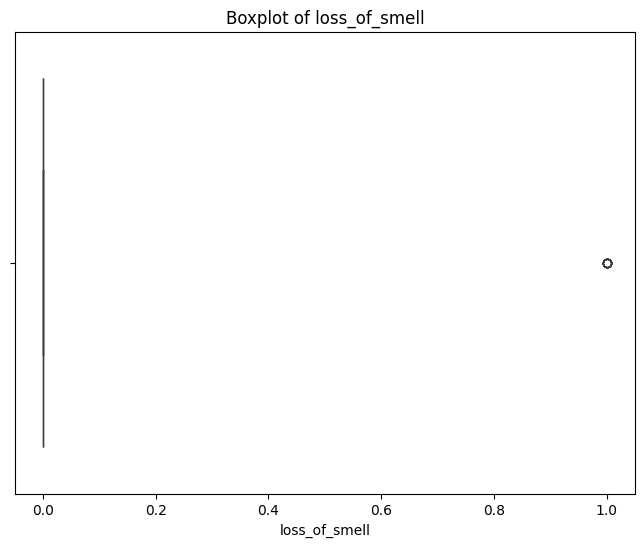

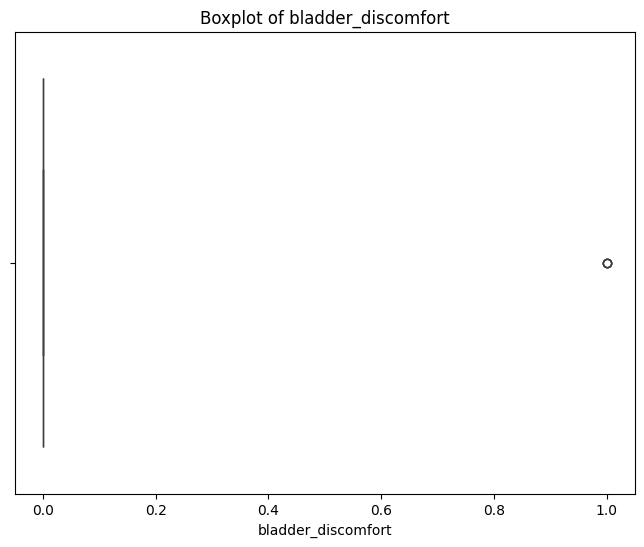

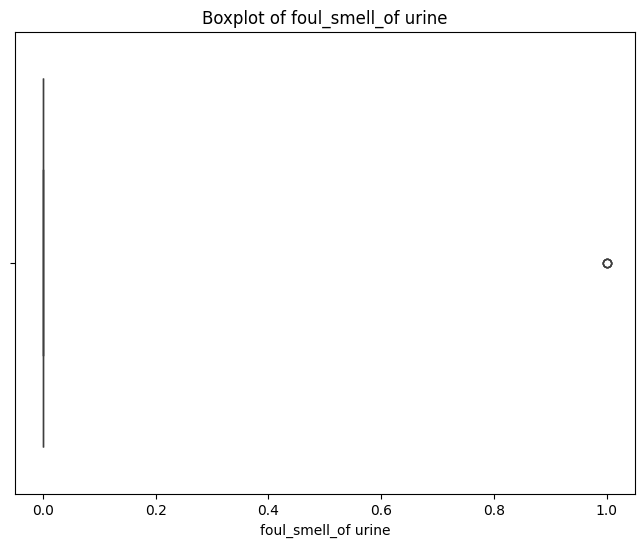

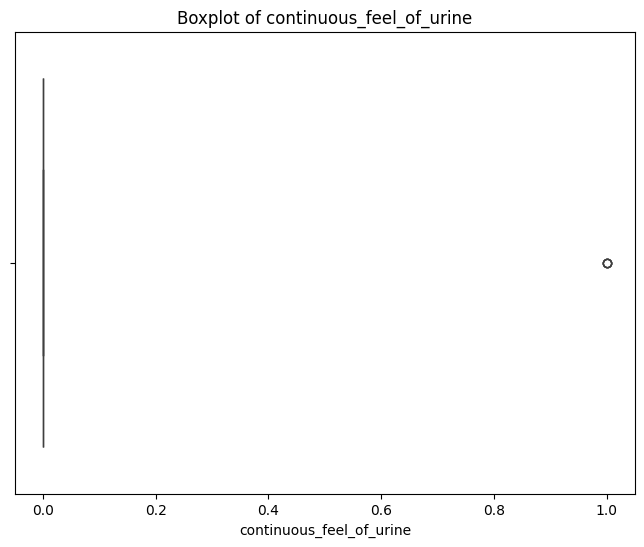

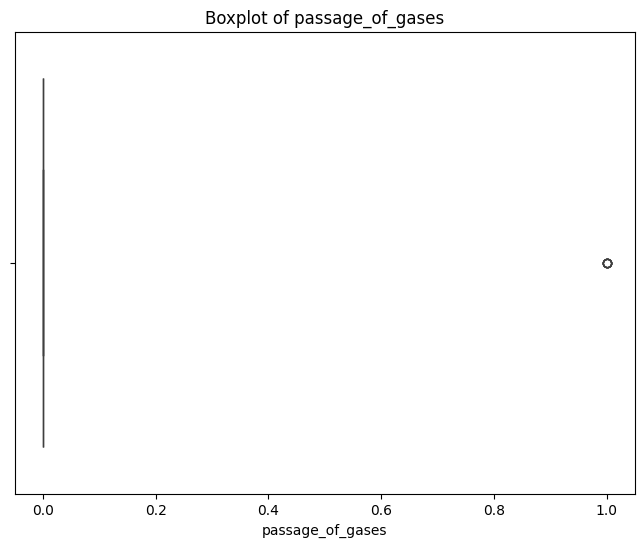

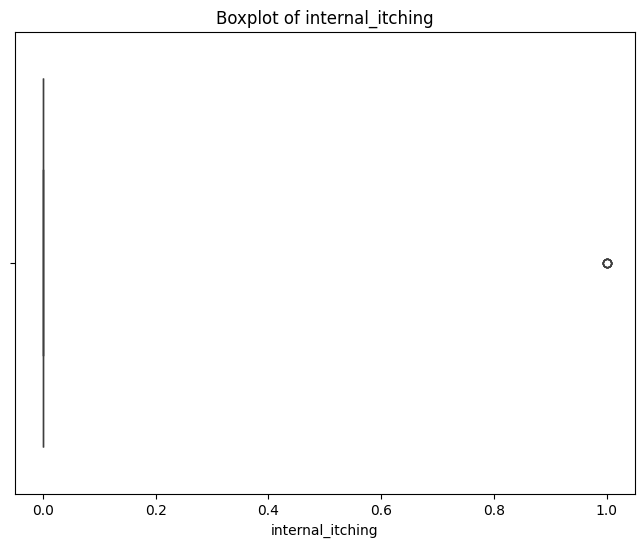

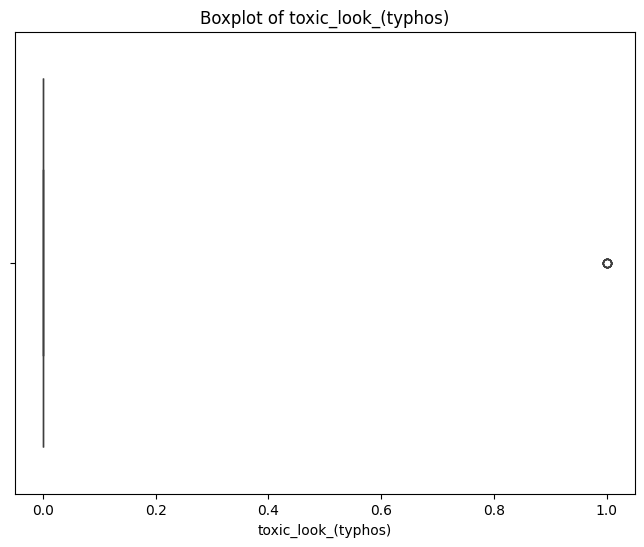

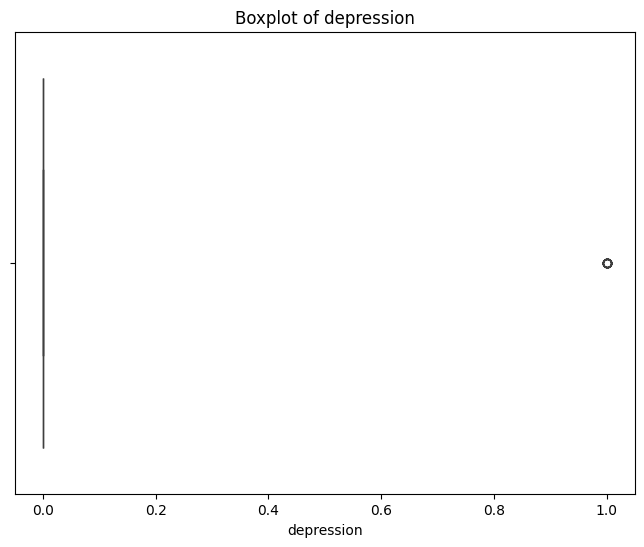

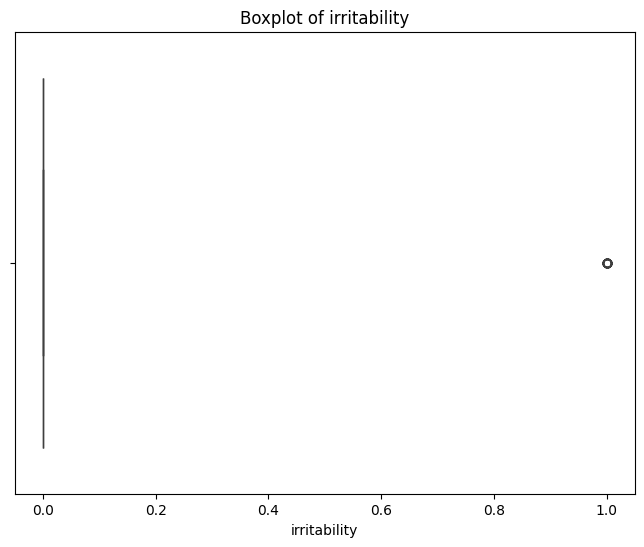

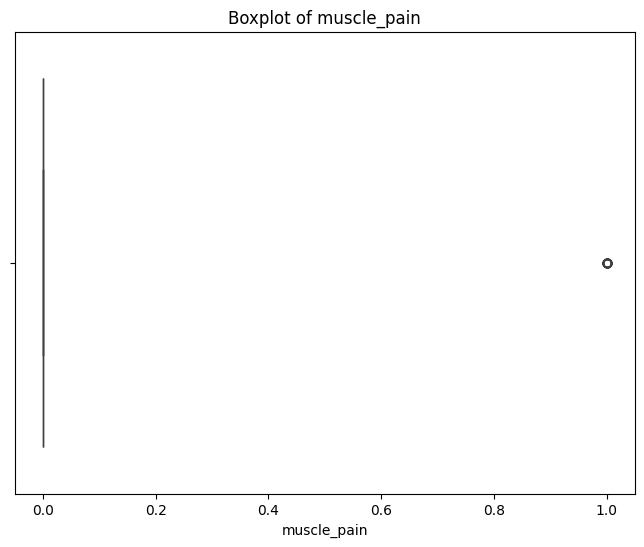

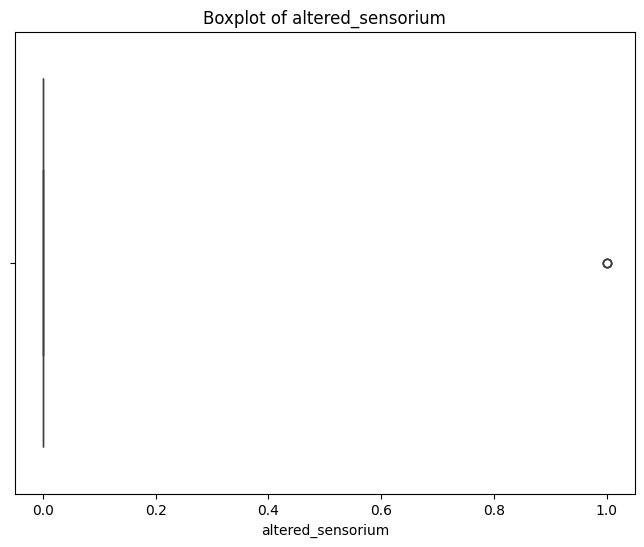

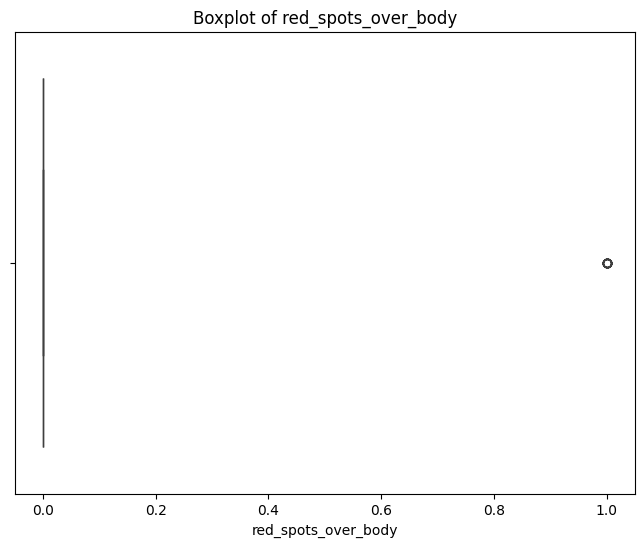

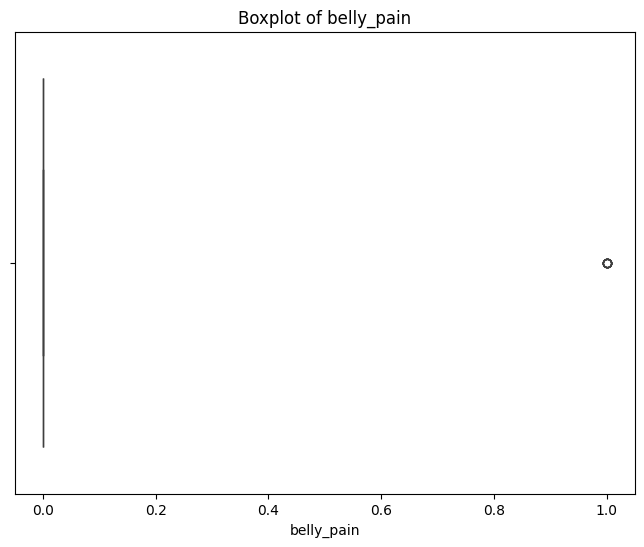

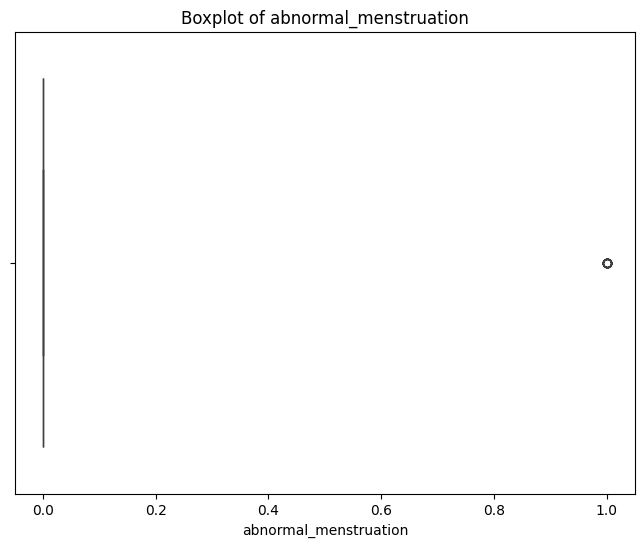

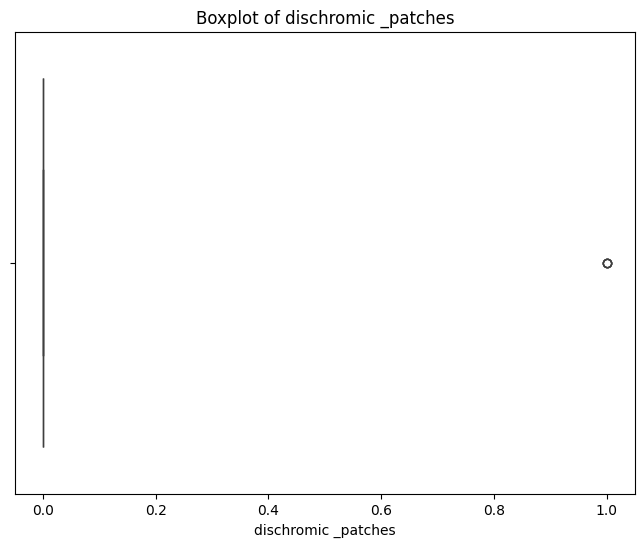

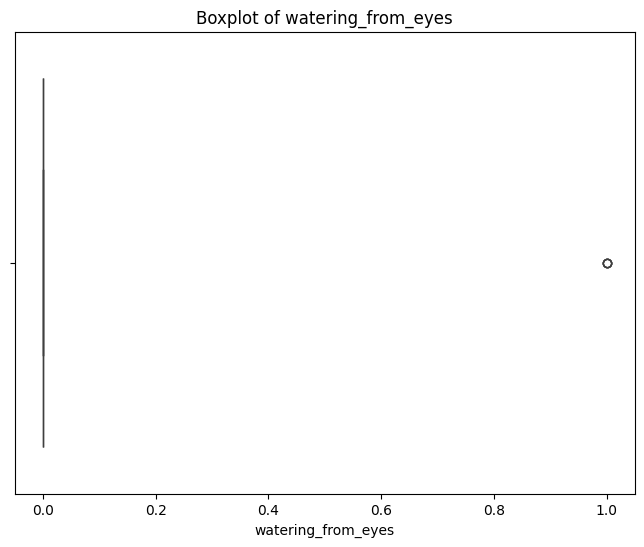

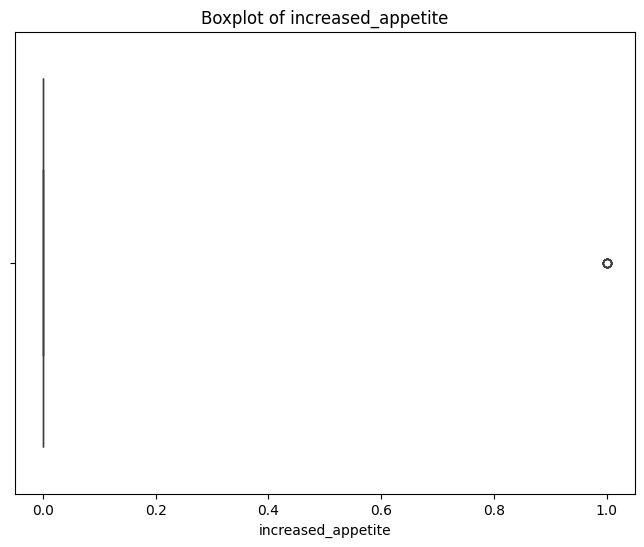

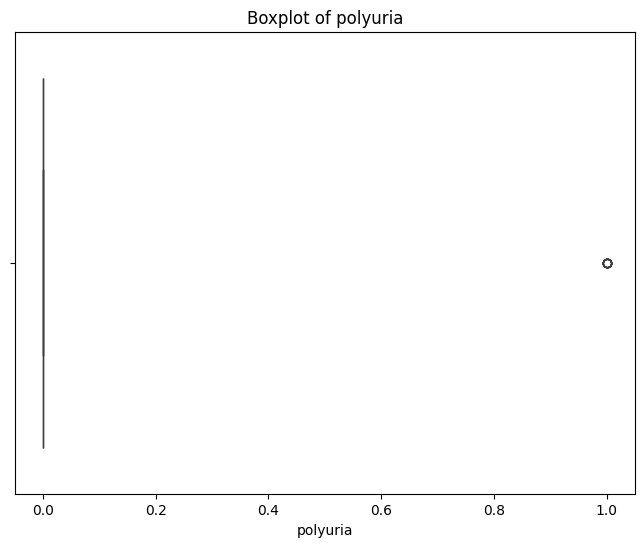

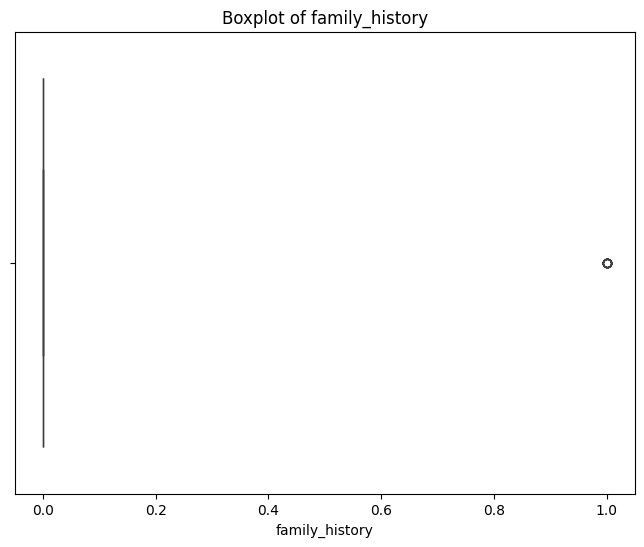

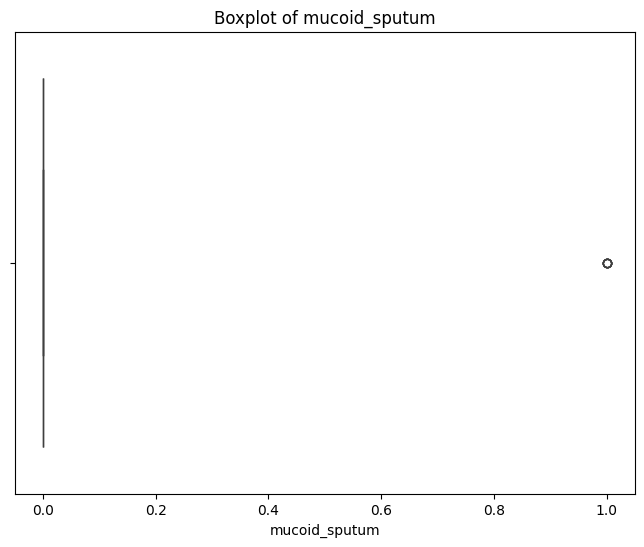

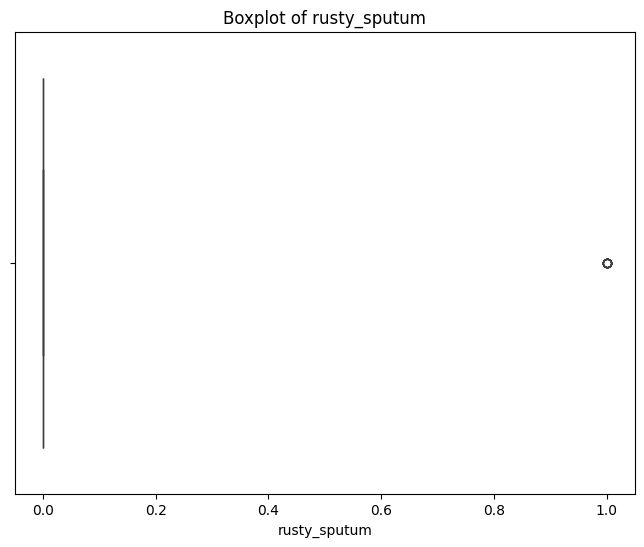

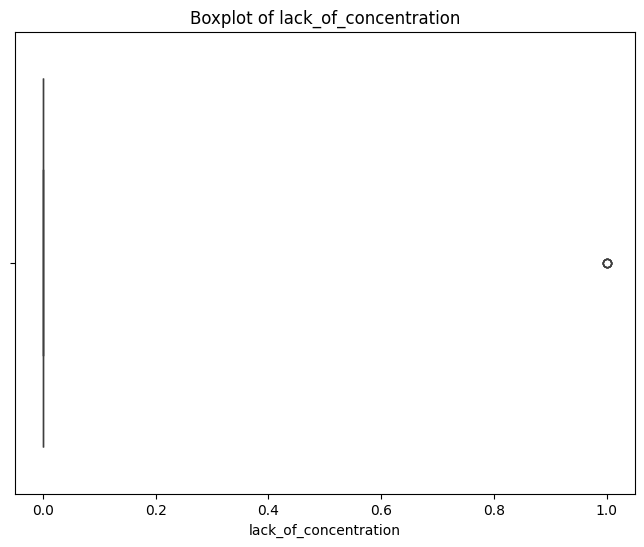

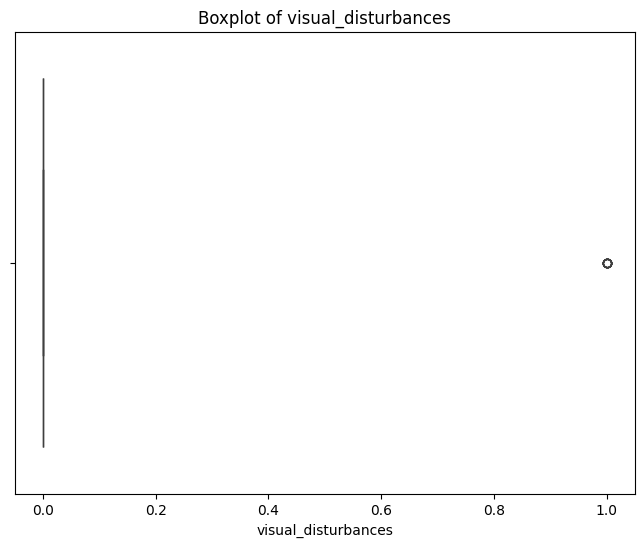

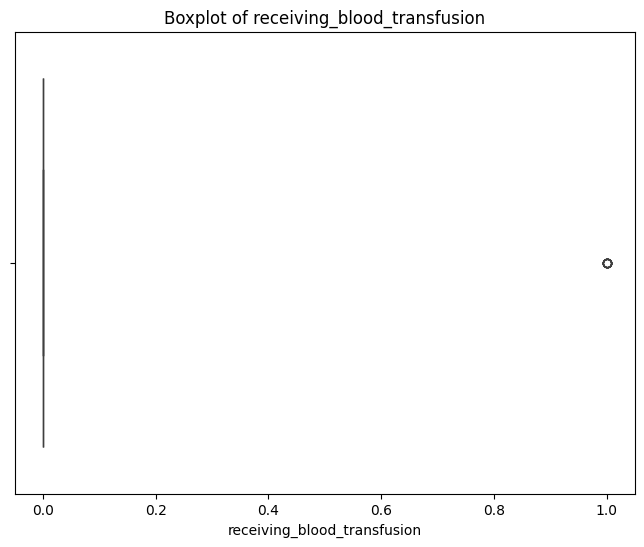

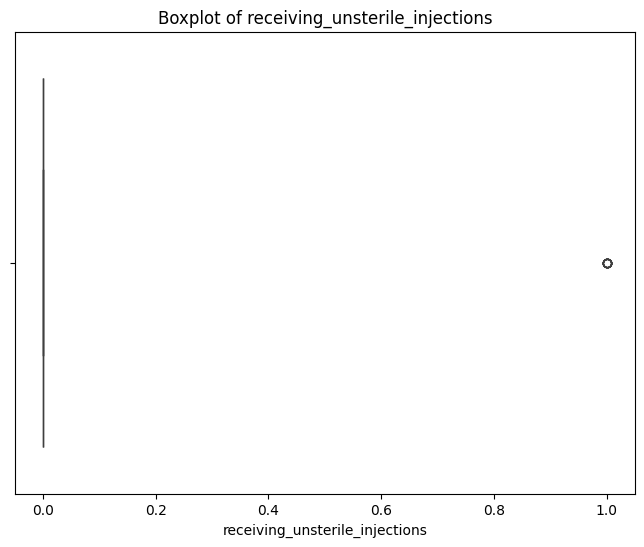

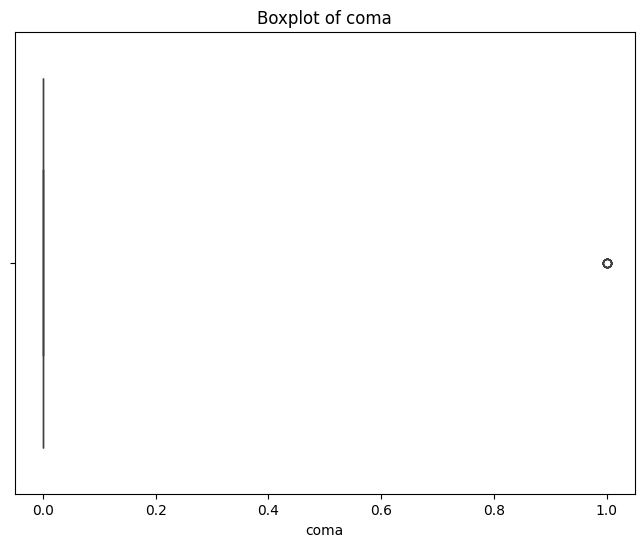

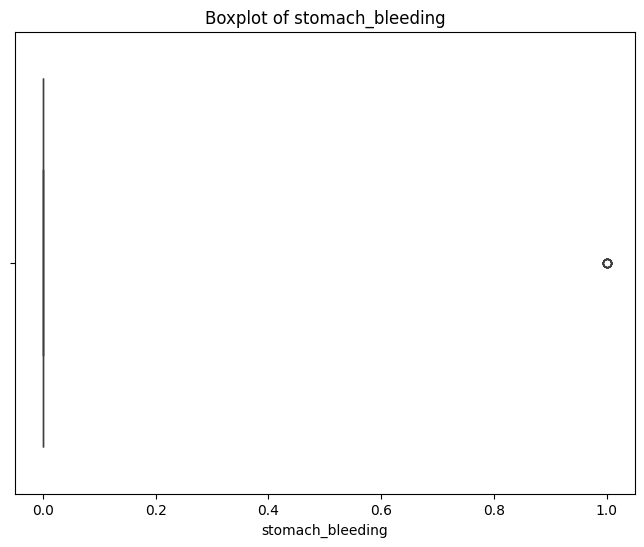

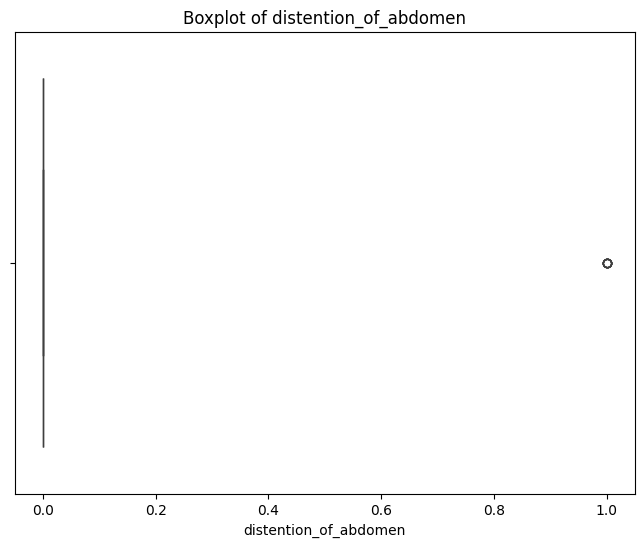

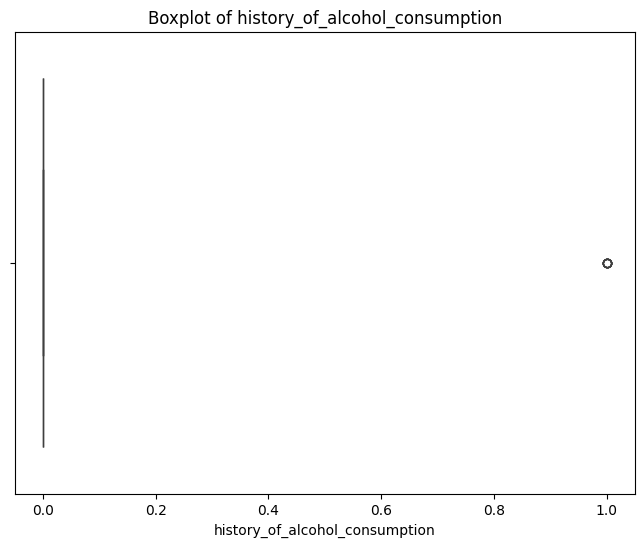

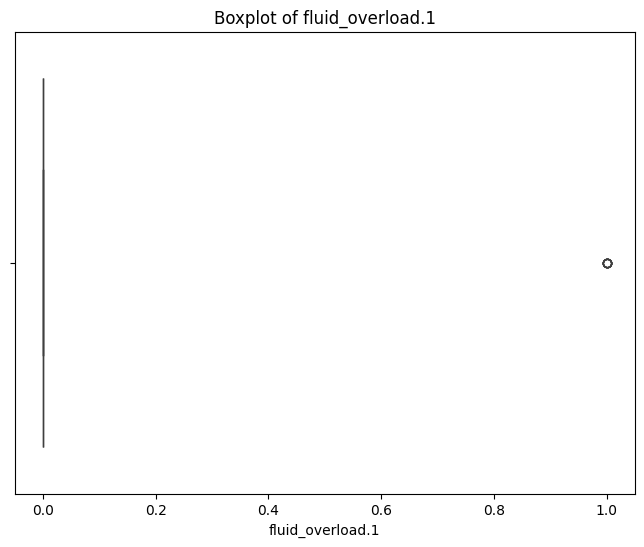

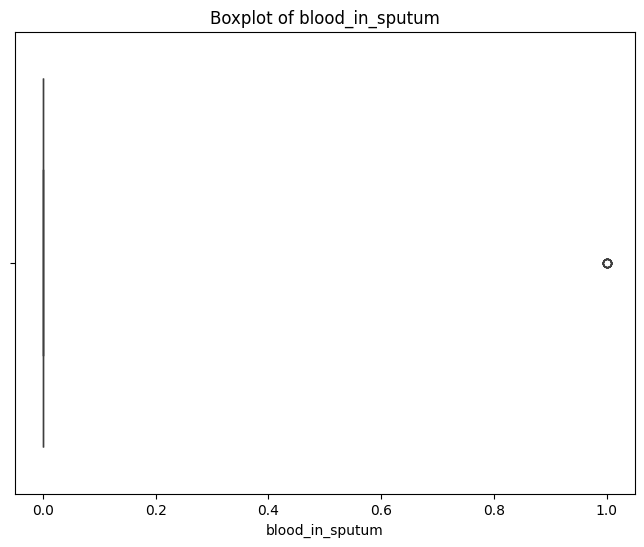

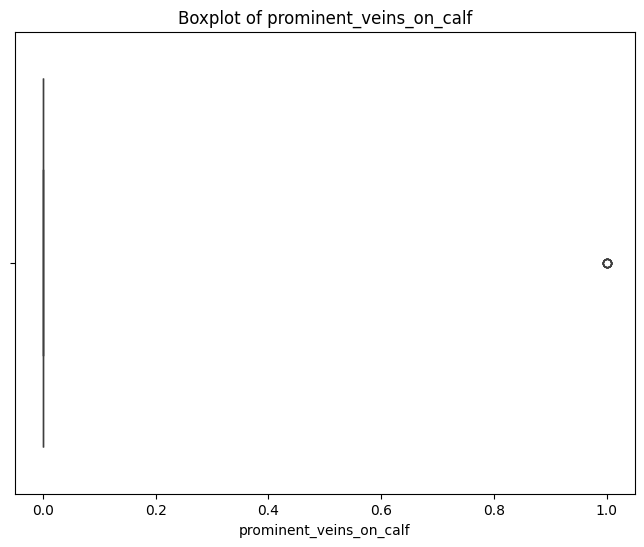

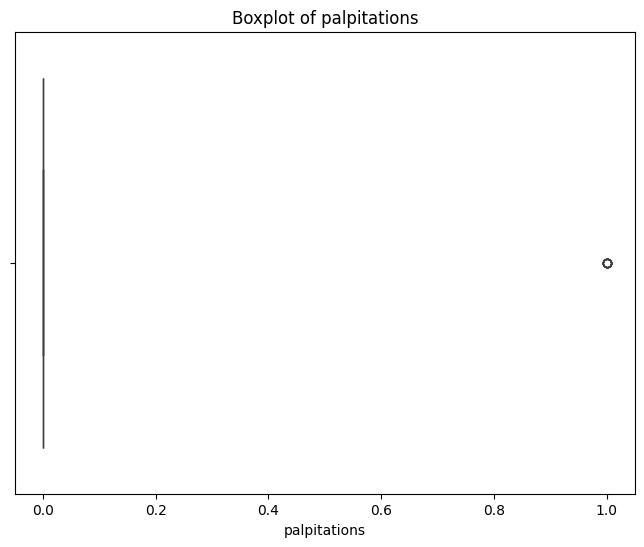

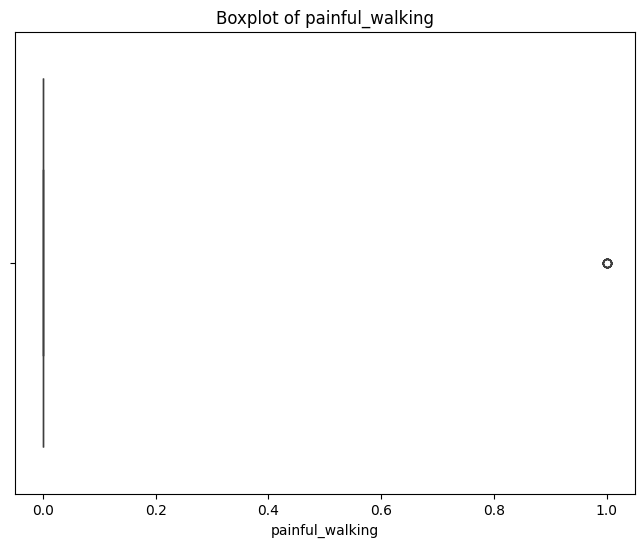

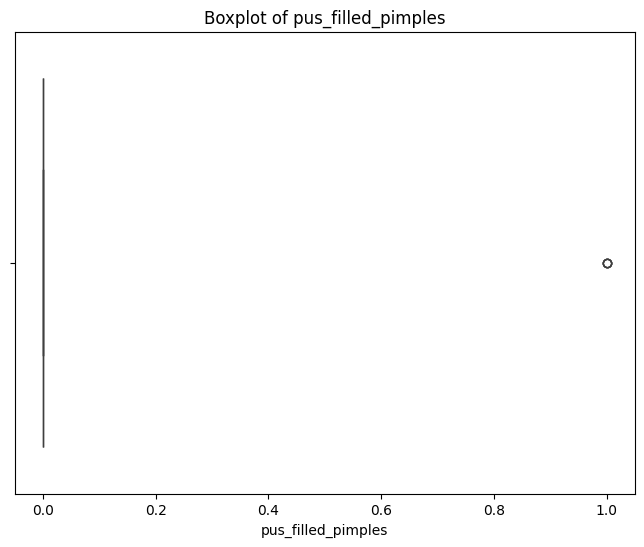

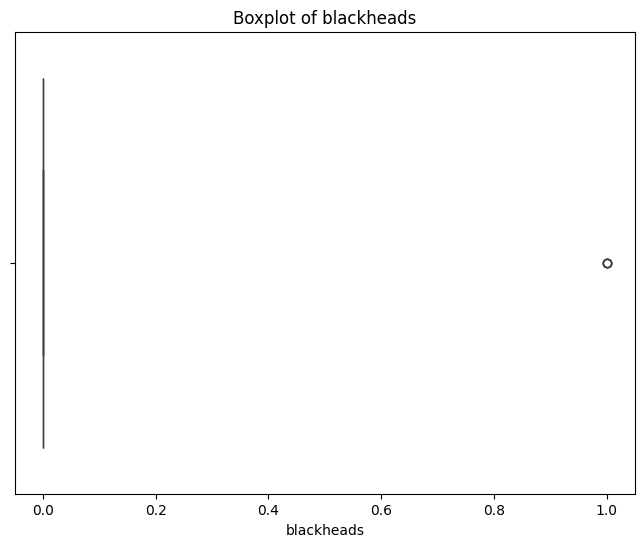

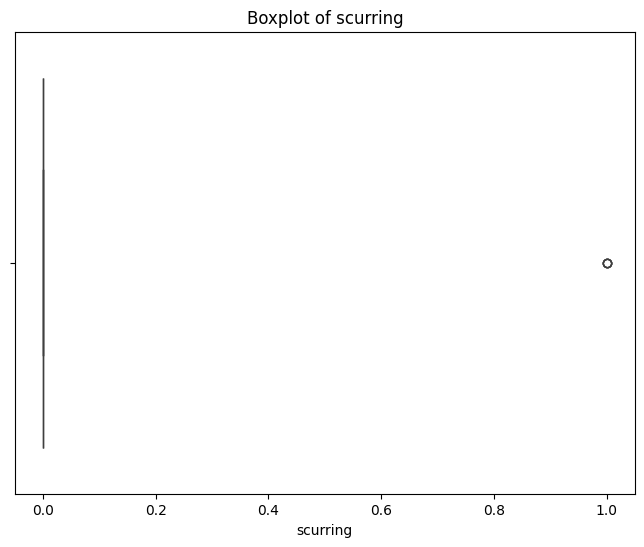

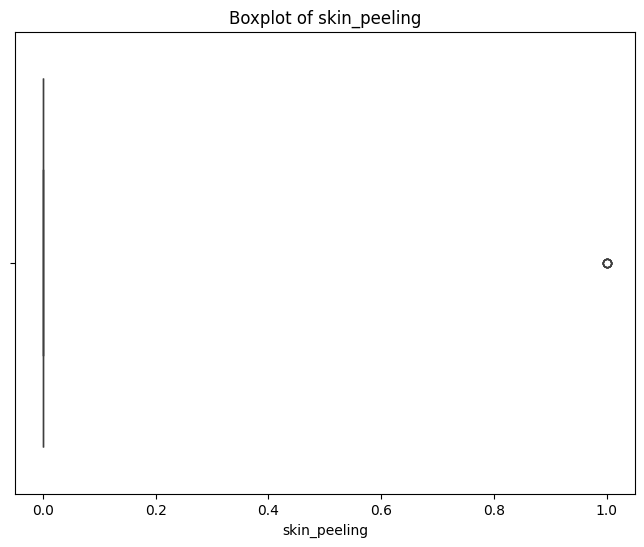

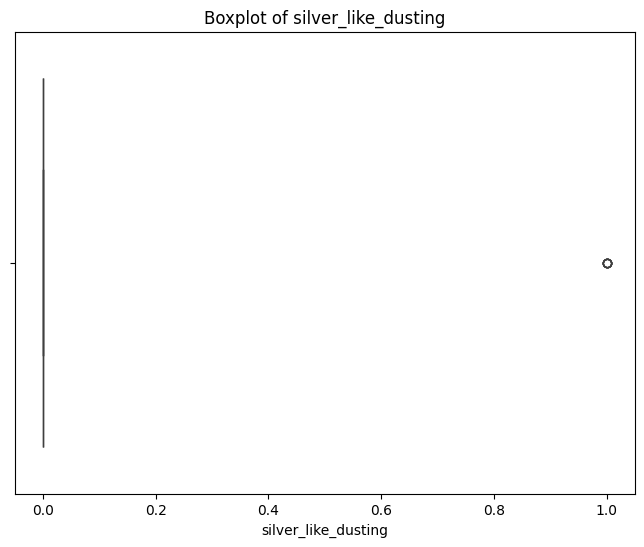

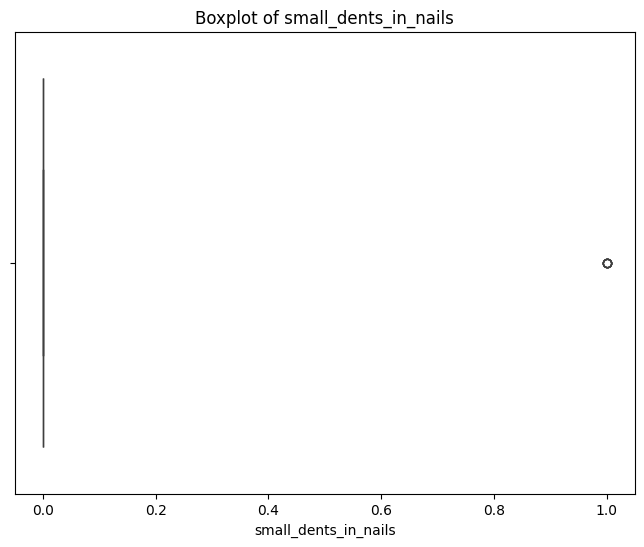

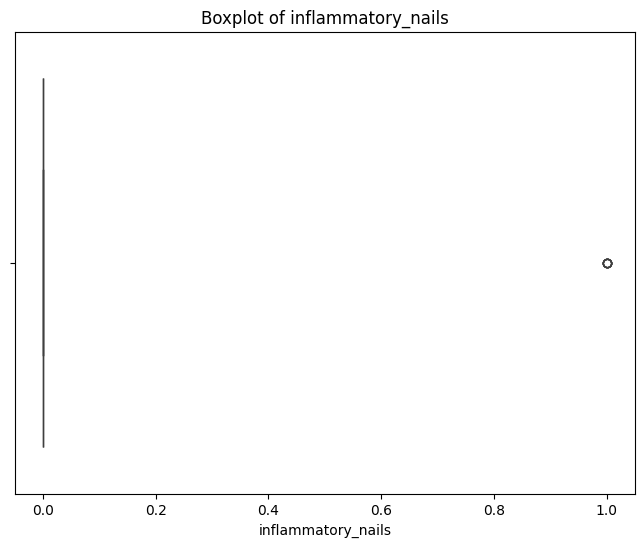

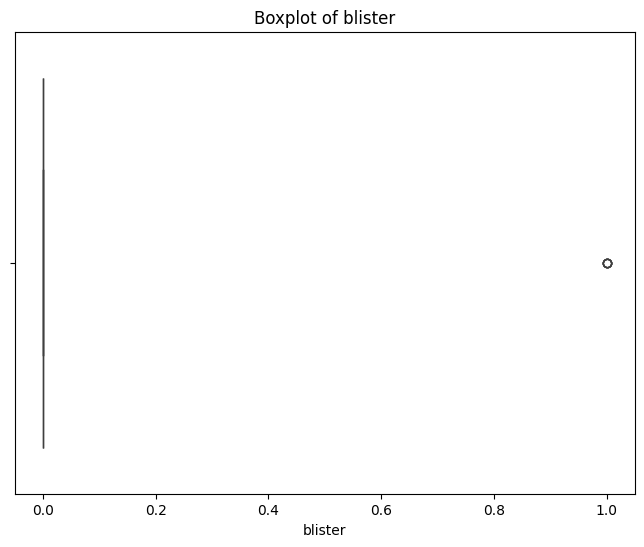

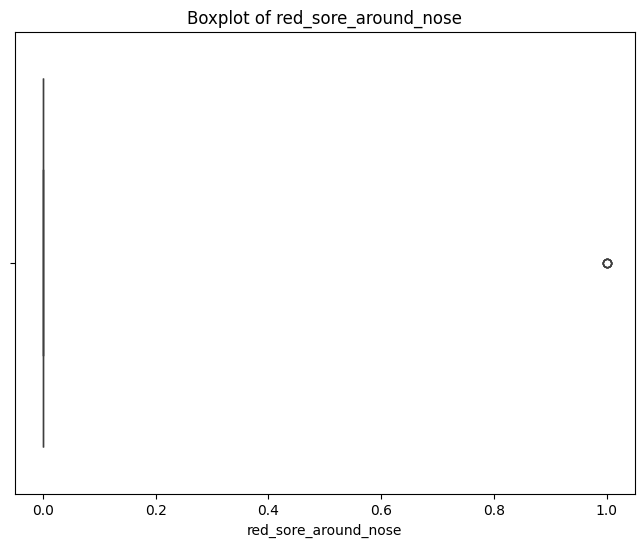

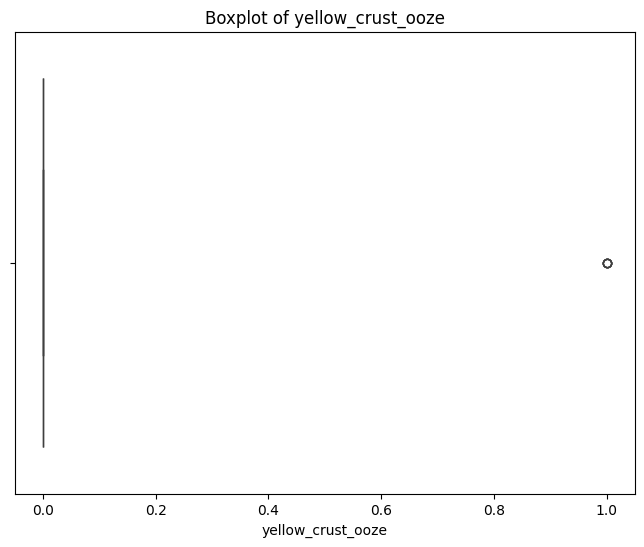

In [9]:
#checking any outliers
numerical_features = data.select_dtypes(include=np.number)
for col in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# Data pre processing

In [10]:
# converting prognosis values into numerical using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [11]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14


In [13]:
#exporting as pkl for future work
import joblib
import os

os.makedirs("/mnt/data", exist_ok=True)
joblib.dump(encoder, "/mnt/data/disease_label_encoder.pkl")

['/mnt/data/disease_label_encoder.pkl']

In [14]:
from google.colab import files
files.download("/mnt/data/disease_label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
#cleaned dataset
data.to_csv('cleaned_symdata_2022.csv', index=False)


In [16]:
#loading cleaned dataset
df = pd.read_csv('cleaned_symdata_2022.csv')

In [17]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14


In [18]:
#splitting the dataset for model training
X = df.drop(columns=["prognosis"])
y = df["prognosis"]

# Split the dataset (80% training 20%testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 243, Testing samples: 61


# Model Training and Evalution

In [19]:
#training the model (randomforestclassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the modeld
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
#checking accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier Model Accuracy: {accuracy * 100:.2f}%")

RandomForestClassifier Model Accuracy: 100.00%


In [21]:
#training the model (SVM model)
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

In [22]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy * 100:.2f}%")

SVM Model Accuracy: 100.00%


In [23]:
#training the model (GaussianNB)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)

In [24]:
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"NB Model Accuracy: {accuracy * 100:.2f}%")

NB Model Accuracy: 100.00%


In [25]:
#classifcation report
from sklearn.metrics import classification_report
print("Classification Report for Random Forest:\n", classification_report(y_test, model.predict(X_test)))
print("\nClassification Report for SVM:\n", classification_report(y_test, svm_model.predict(X_test)))
print("\nClassification Report for Naive Bayes:\n", classification_report(y_test, nb_model.predict(X_test)))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00      1.00      

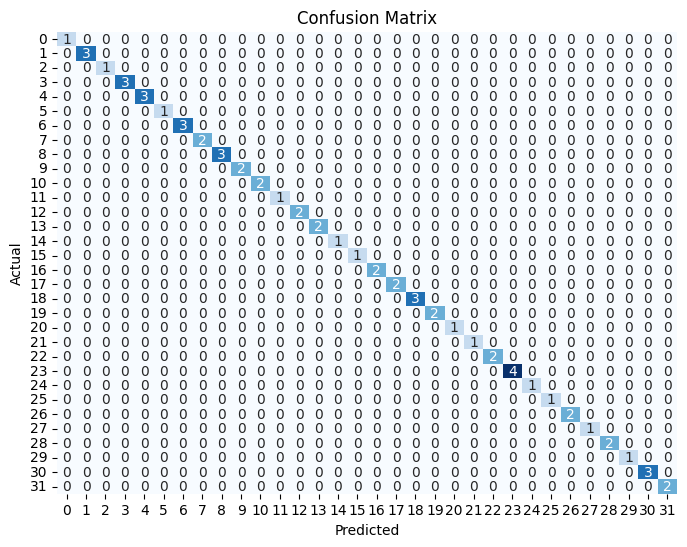

In [26]:
# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Function to test predictions

In [27]:
def predict_disease(symptoms):
    # Creating a DataFrame from the input symptoms
    input_data = pd.DataFrame(columns=X.columns)
    for symptom in symptoms:
        if symptom in X.columns:
            input_data.loc[0, symptom] = 1
        else:
            print(f"Warning: Symptom '{symptom}' not found in the dataset.")

    input_data = input_data.fillna(0)

    # Making prediction and getting the predicted disease
    prediction = model.predict(input_data)
    predicted_disease = encoder.inverse_transform(prediction)[0]
    return predicted_disease

In [28]:
#testing the function (example 1)
symptoms = ["painful_walking", "red_sore_around_nose", "stomach_pain"]
predicted_disease = predict_disease(symptoms)
print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: Drug Reaction


<ipython-input-27-81b93da5e961>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_data = input_data.fillna(0)


In [29]:
#example 2
symptoms = ["continuous_feel_of_urine", "foul_smell_of urine", "bladder_discomfort"]
predicted_disease = predict_disease(symptoms)
print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: Urinary Tract Infection


<ipython-input-27-81b93da5e961>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_data = input_data.fillna(0)


In [30]:
data.to_csv('trained_symdata_2022.csv', index=False)

In [31]:

#save the model for future implementation
joblib.dump(model, "/mnt/data/disease_prediction_model.pkl")
joblib.dump(X.columns, "/mnt/data/symptom_labels.pkl")

['/mnt/data/symptom_labels.pkl']

In [32]:
from google.colab import files
files.download("/mnt/data/disease_prediction_model.pkl")
files.download("/mnt/data/symptom_labels.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
df_trained = pd.read_csv('trained_symdata_2022.csv')

In [34]:
#The function to extract the word from the user input
import re
import joblib

symptom_labels = joblib.load("/mnt/data/symptom_labels.pkl")

# Convert symptom labels to human-readable format for matching
label_mapping = {s: s.replace("_", " ").lower() for s in symptom_labels}
reverse_mapping = {v: k for k, v in label_mapping.items()}

processed_symptom_list = list(label_mapping.values())

def extract_symptoms(user_input):
    """
    Extracts symptoms from user input using exact phrase matching.
    Allows users to write 'chest pain' instead of 'chest_pain'.
    """
    user_input = user_input.lower()
    extracted = []

    for readable_symptom in processed_symptom_list:
        # Match whole phrases in user input
        if re.search(rf"\b{re.escape(readable_symptom)}\b", user_input):
            extracted.append(reverse_mapping[readable_symptom])

    return extracted

# Testing the function
user_input = "I have a terrible chest pain and sore throat , skin rash"
symptoms = extract_symptoms(user_input)
print(f"Extracted Symptoms: {symptoms}")


Extracted Symptoms: ['skin_rash', 'chest_pain']
